In [1]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline
pi = np.pi
from scipy.integrate import odeint
import random
from PIL import Image, ImageDraw
import glob
import os

# Defining the model

In [2]:
def dP_dt(P,t): #P is a vector such that P[0] = S, P[1] = D, P[2] = T, P[3] = R
    flow = [] #Flow is a list containing the flow function definitions of S,D,T,R respectively
    flow.append(A - b1*P[0]*P[1] - u*P[0] + n*P[3])
    flow.append(b1*P[0]*P[1] + b2*P[2]*P[1] - (u+d1+v)*P[1])
    flow.append(v*P[1] - b2*P[2]*P[1] - (u+d2+s)*P[2])
    flow.append(s*P[2] - (u+n)*P[3])
    return flow

In [3]:
def R_num (A,b1,u,d1,v):
    return (A*b1)/(u*(u+d1+v))

In [4]:
def Equilibrium (S,D,T,R):
    return (S[-1],D[-1],T[-1],R[-1])

# Gif Generator

In [5]:
def generate_gif(input_dir,output_dir,framerate):
    frames = []
    
    n_frames = len(os.listdir(input_dir))
    for i in range(n_frames):
        filenames.append(input_dir + 'frame_' + str(i) + '.png')
        
    for i in filenames:
        frames.append(Image.open(i))
        
    gifname = output_dir + 'Movie.gif'
    duration = int(1000/framerate)
    frames[0].save(gifname, format='GIF',append_images=frames[1:],save_all=True,duration=duration, loop=1)

# Variation of Ro with b1 and v

In [97]:
A = 0.4 #Recruitment rate of moderate and occasional drinkers
u = 0.25 #Natural death rate of each population class
d1 = 0.35 #Natural death rate of each population class
N = 1000
b1 = 0.001 #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
v = 0.001 #The proportion of drinkers who enter intreatment

Ros1 = []
Ros2 = []
b1s = []
vs = []

for i in range(N):
    v = 0.4
    b1_old = b1
    b1 = b1_old + i*0.001
    ro = R_num(A,b1,u,d1,v)
    b1s.append(b1)
    Ros1.append(ro)
    
for i in range(N):
    b1 = 0.35
    v_old = v
    v = v_old + i*0.001
    ro = R_num(A,b1,u,d1,v)
    vs.append(v)
    Ros2.append(ro)



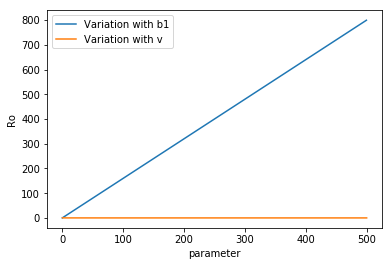

In [98]:
plt.plot(b1s,Ros1,label = 'Variation with b1')
plt.plot(vs,Ros2, label = 'Variation with v')

plt.xlabel('parameter')
plt.ylabel('Ro')
plt.legend()
plt.show()

In [99]:
Ros2

[0.5599999999999999,
 0.5594405594405595,
 0.5583250249252242,
 0.5566600397614313,
 0.5544554455445544,
 0.5517241379310344,
 0.5484818805093046,
 0.5447470817120622,
 0.5405405405405405,
 0.5358851674641149,
 0.5308056872037913,
 0.5253283302063789,
 0.5194805194805194,
 0.5132905591200732,
 0.5067873303167421,
 0.4999999999999999,
 0.49295774647887314,
 0.48568950563746743,
 0.4782237403928265,
 0.47058823529411753,
 0.4628099173553718,
 0.4549147034930949,
 0.4469273743016759,
 0.4388714733542318,
 0.4307692307692306,
 0.42264150943396217,
 0.4145077720207252,
 0.4063860667634251,
 0.3982930298719771,
 0.39024390243902424,
 0.3822525597269623,
 0.37433155080213887,
 0.36649214659685847,
 0.35874439461883395,
 0.3510971786833854,
 0.34355828220858886,
 0.3361344537815125,
 0.32883147386964173,
 0.3216542217116598,
 0.31460674157303364,
 0.3076923076923076,
 0.3009134873723804,
 0.29427220178665253,
 0.2877697841726618,
 0.28140703517587934,
 0.27518427518427513,
 0.269101393560788,


# Simulations

## Parameter set 1

In [6]:
A = 0.4 #Recruitment rate of moderate and occasional drinkers
b1 = 0.35 #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
b2 = 0.3 #The transmission coefficient from drinkers in treatment to heavy drinkers
u = 0.25 #Natural death rate of each population class
s = 0.1 #Recovery rate of drinkers in treatment
n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
v = 0.4 #The proportion of drinkers who enter intreatment
d1 = 0.35 #Natural death rate of each population class
d2 = 0.3 #Drinking related death rate of drinkers intreatment

R_o = R_num(A,b1,u,d1,v)
R_o

0.5599999999999999

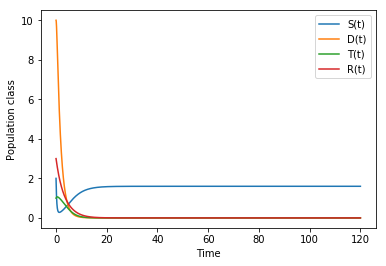

In [7]:
init = [2,10,1,3]
ts = np.linspace(0,120,10000)
Ns = odeint(dP_dt,init,ts)
S = Ns[:,0]
D = Ns[:,1]
T = Ns[:,2]
R = Ns[:,3]

plt.plot(ts,S,label = 'S(t)')
plt.plot(ts,D,label = 'D(t)')
plt.plot(ts,T,label = 'T(t)')
plt.plot(ts,R,label = 'R(t)')
plt.xlabel('Time')
plt.ylabel('Population class')
plt.legend()
plt.show()

In [8]:
Equilibrium(S,D,T,R)

(1.6000000004512533,
 2.2552760030049623e-16,
 5.067875833609806e-14,
 -9.219064246004465e-13)

##### A Diesease Free Equlibrium (DFE) at the points mentioned above. Agrees with theorem 6.2 regarding the stability.

### Multiple initial conditions (Randomised initial conditions)

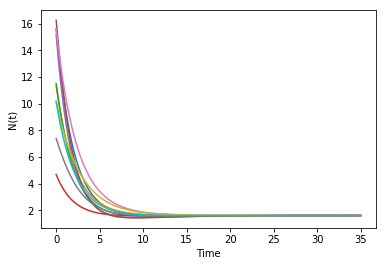

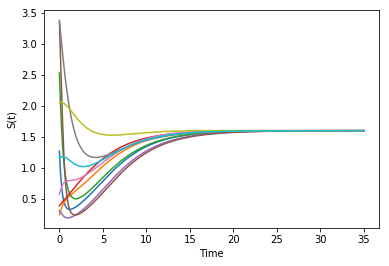

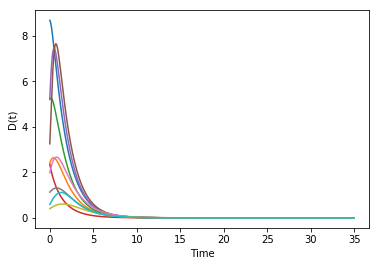

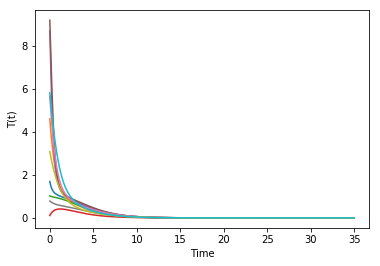

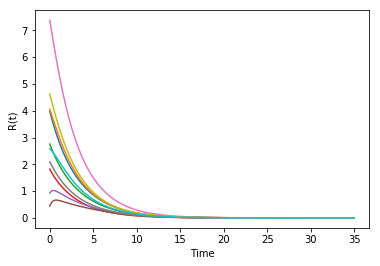

In [9]:
init = []
Super_Ns = []
Super_total = []
for i in range(10):
    temp_init = []
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    
    init.append(temp_init)
    
    ts = np.linspace(0,35,10000)
    
    Ns = odeint(dP_dt,temp_init,ts)
    total = np.array([Ns[:,0],Ns[:,1],Ns[:,2],Ns[:,3]])
    Super_total.append(total.sum(axis=0))
    
    Super_Ns.append(Ns) 
    
    
direcname = 'F:/Non-Linear Dynamics and Chaos/Project/Images/Param1/'
# Just N
for i in range(len(init)):
    plt.plot(ts,Super_total[i])
    
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.savefig(direcname + 'N(t)')
plt.show()

# Just S
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,0])
    
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.savefig(direcname + 'S(t)')
plt.show()


# Just D
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,1])
    
plt.xlabel('Time')
plt.ylabel('D(t)')
plt.savefig(direcname + 'D(t)' + '.png')
plt.show()

# Just T
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,2])
    
plt.xlabel('Time')
plt.ylabel('T(t)')
plt.savefig(direcname + 'T(t)' + '.png')
plt.show()

# Just R
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,3])
    
plt.xlabel('Time')
plt.ylabel('R(t)')
plt.savefig(direcname + 'R(t)' + '.png')
plt.show()

## Generating the bifurcation diagrams

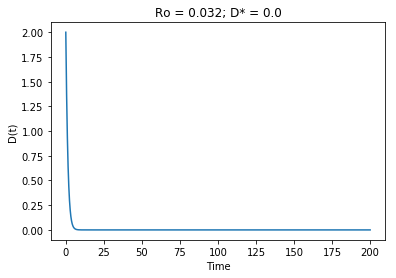

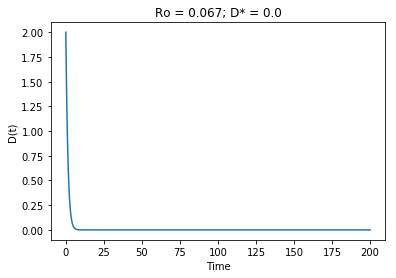

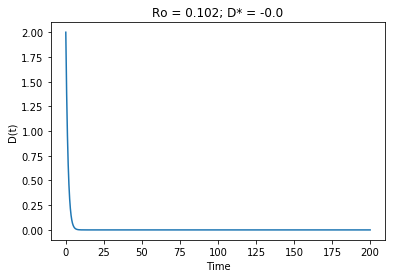

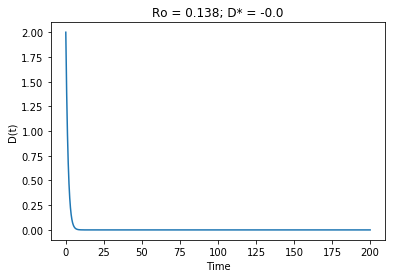

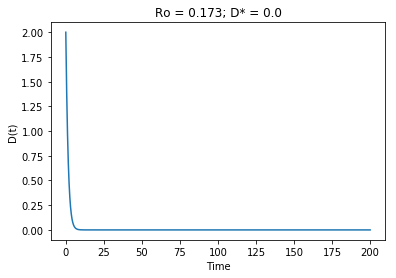

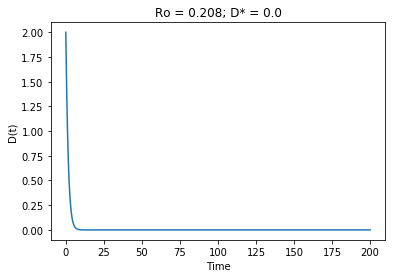

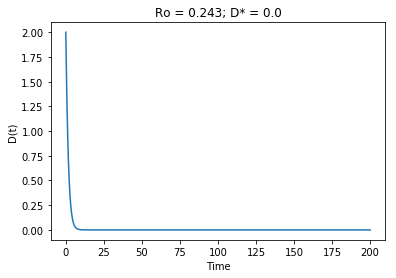

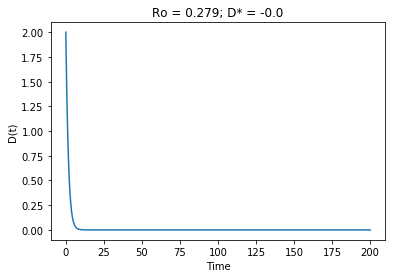

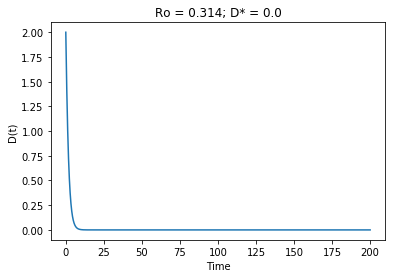

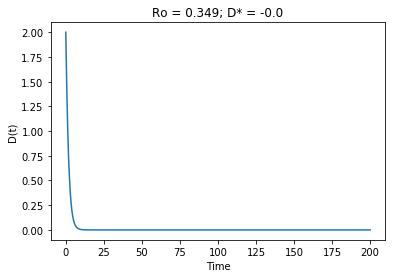

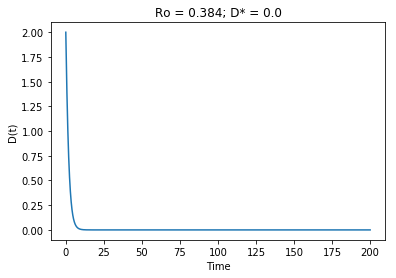

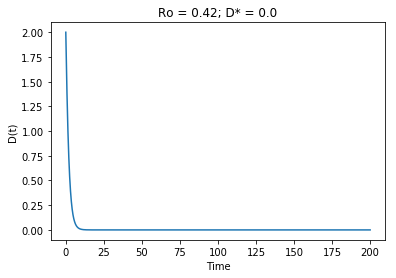

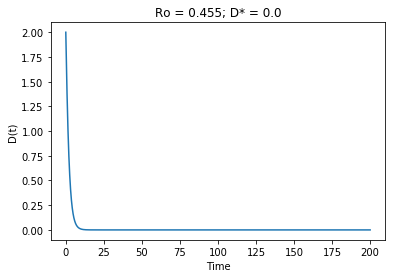

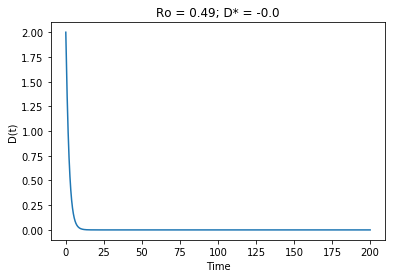

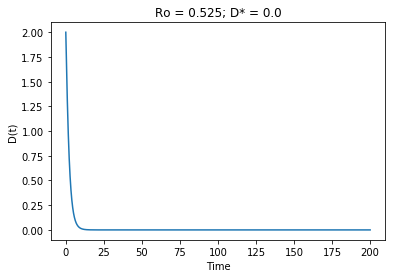

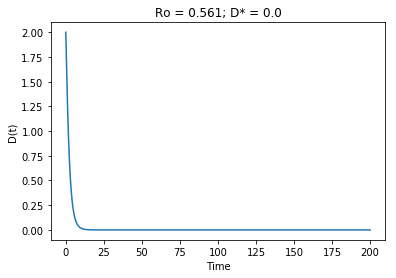

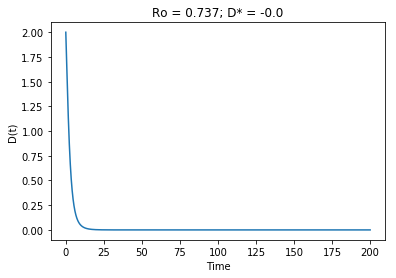

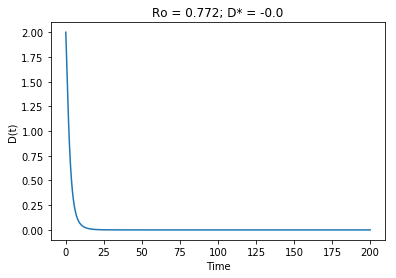

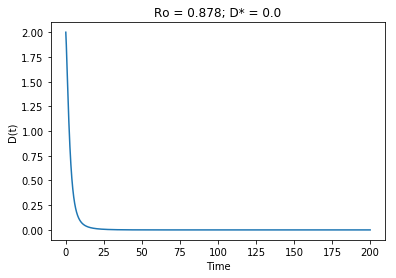

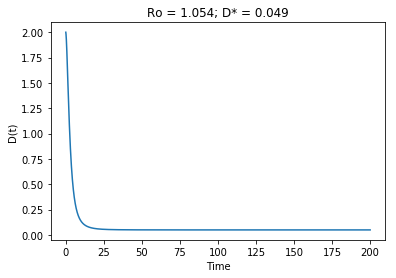

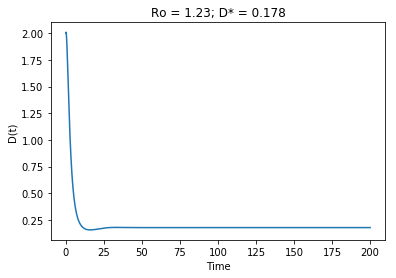

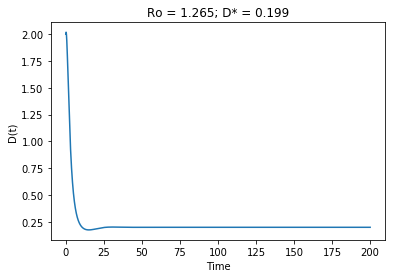

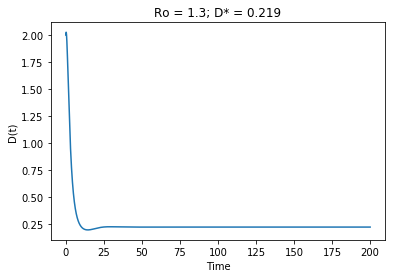

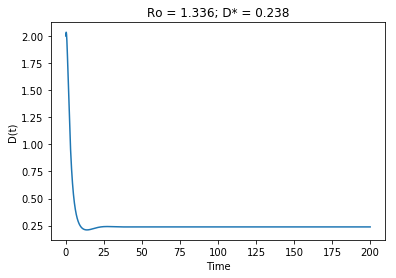

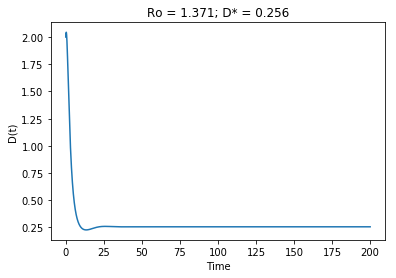

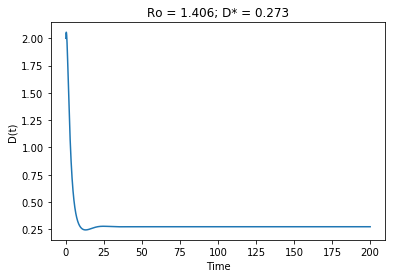

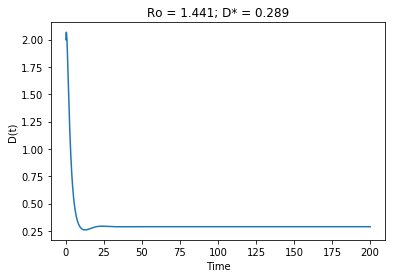

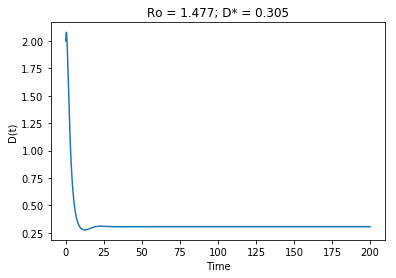

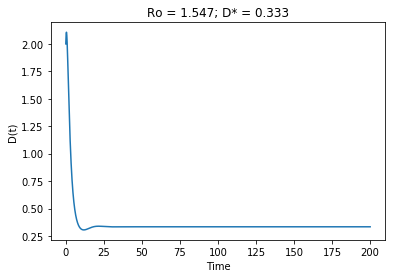

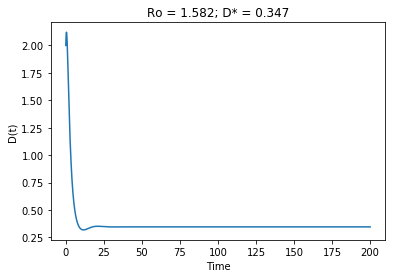

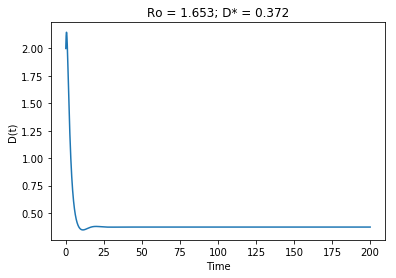

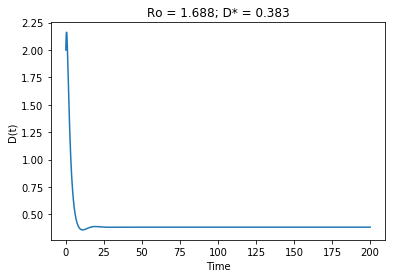

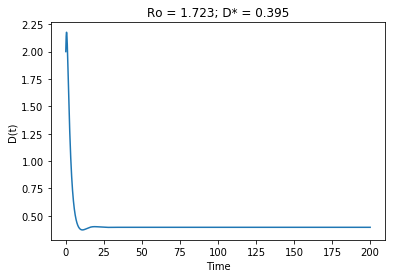

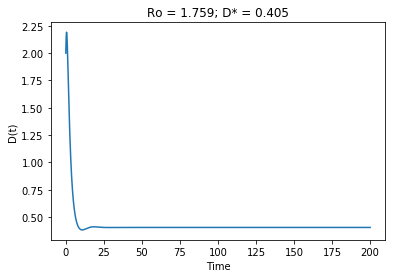

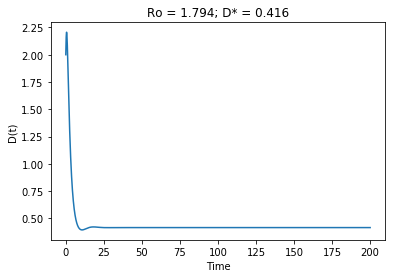

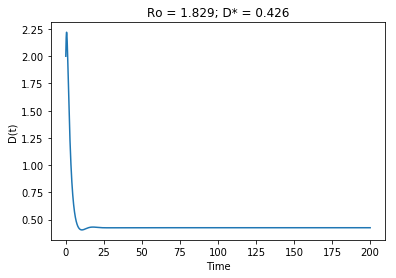

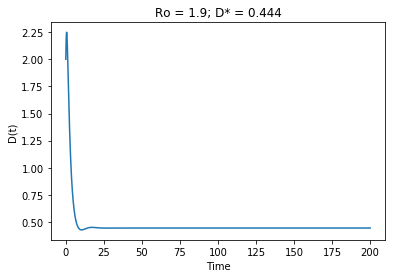

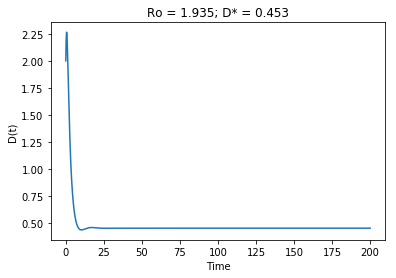

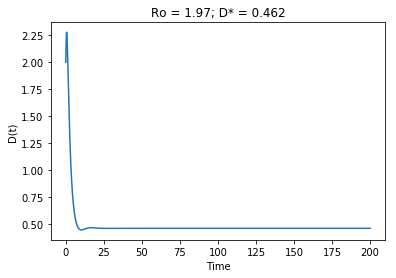

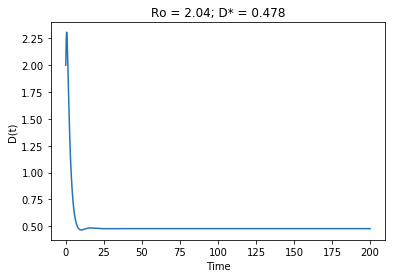

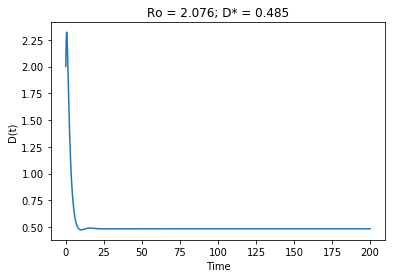

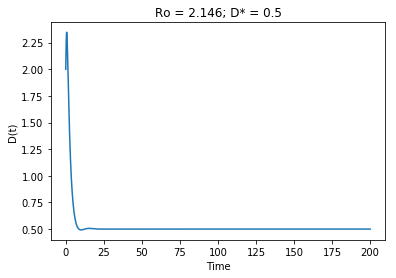

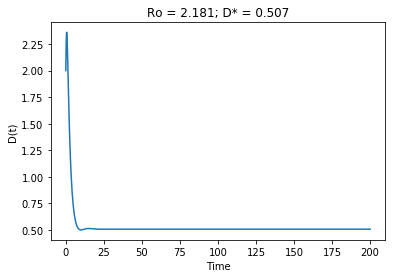

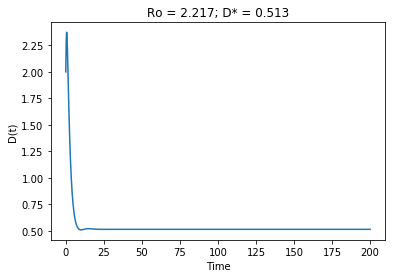

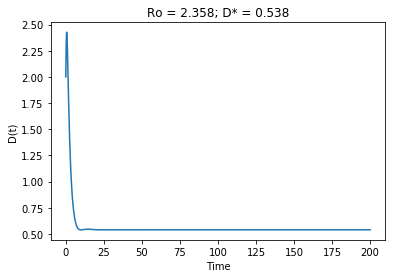

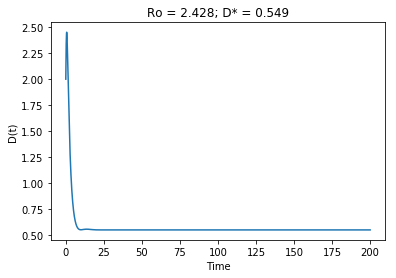

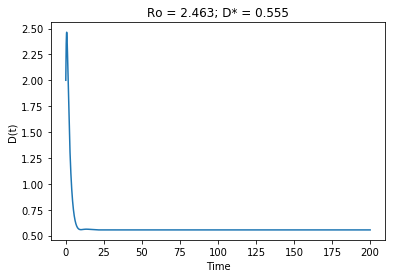

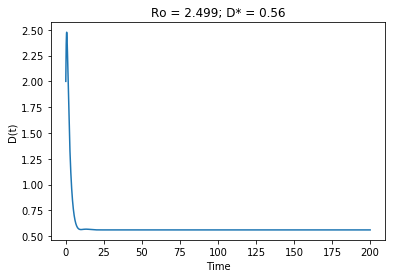

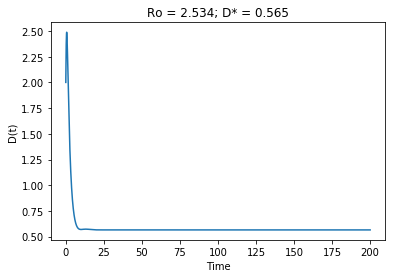

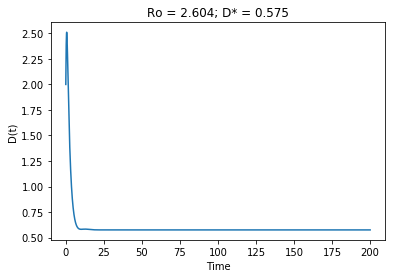

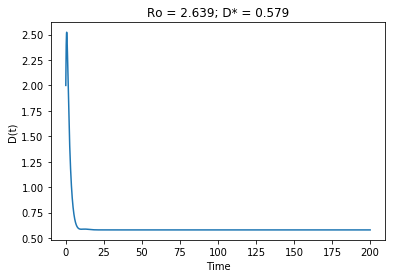

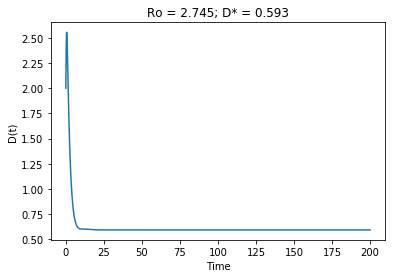

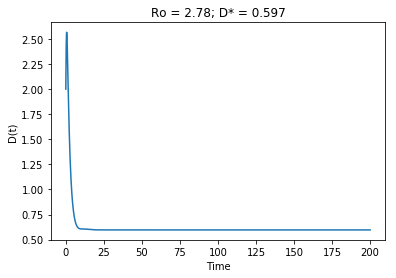

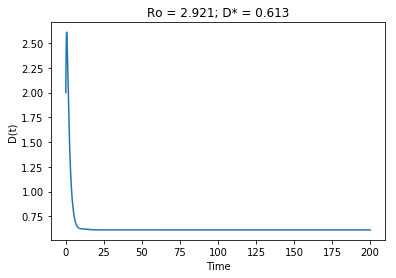

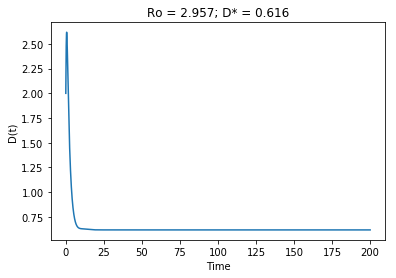

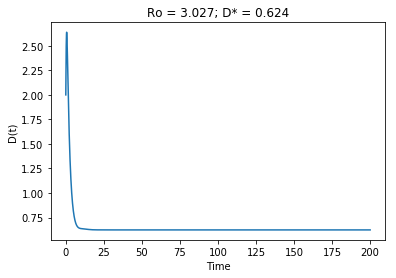

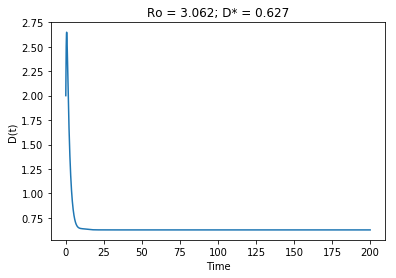

In [25]:
## Generating the frames
##Varying R_o with respect to b1
n_frames = 90
Ros = []
init = [2,2,1,3]
b1_list = np.linspace(0.01,0.99,n_frames)

D_fp_list = []
D_der_list = []

for i in range(n_frames):
    A = 0.8 #Recruitment rate of moderate and occasional drinkers
    b1 = b1_list[i] #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
    b2 = 0.3 #The transmission coefficient from drinkers in treatment to heavy drinkers
    u = 0.25 #Natural death rate of each population class
    s = 0.1 #Recovery rate of drinkers in treatment
    n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
    v = 0.4 #The proportion of drinkers who enter intreatment
    d1 = 0.35 #Natural death rate of each population class
    d2 = 0.3 #Drinking related death rate of drinkers intreatment

    R_o = R_num(A,b1,u,d1,v)
    Ros.append(R_o)

    ts = np.linspace(0,200,10000)
    Ns = odeint(dP_dt,init,ts)
    S = Ns[:,0]
    D = Ns[:,1]
    T = Ns[:,2]
    R = Ns[:,3]
    D_fp_list.append(D[-1])
    
    D_der = b1*S*D + b2*T*D - (u+d1+v)*D
    D_der_list.append(D_der)
    
    plt.plot(ts,D,label = 'D(t)')
    plt.xlabel('Time')
    plt.ylabel('D(t)')
    titlename = 'Ro = ' + str(round(R_o,3)) + '; D* = ' + str(round(D[-1],3))
    plt.title(titlename)
    #plt.legend()
    filename = 'F:/Non-Linear Dynamics and Chaos/Project/Frames3/' +'frame_' + str(i) + '.png'
    plt.savefig(filename)
    plt.show()
    
    
    
    

In [26]:
input_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames3/'
filenames = []

for i in range(n_frames):
    filenames.append(input_dir + '/' + 'frame_' + str(i) + '.png')
    
output_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames3/'
framerate = 10
generate_gif(input_dir,output_dir,framerate)

In [158]:
plt.plot(Ros,D_fp_list)
plt.xlabel('Ro')
plt.ylabel('D*')
plt.title('Forward Bifurcation')
direcname = 'F:/Non-Linear Dynamics and Chaos/Project/Images/Bifurcations/'
plt.savefig(direcname + 'forward')
plt.show()

## Phase Portraits

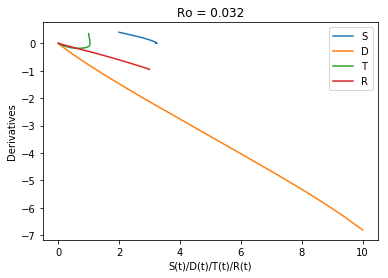

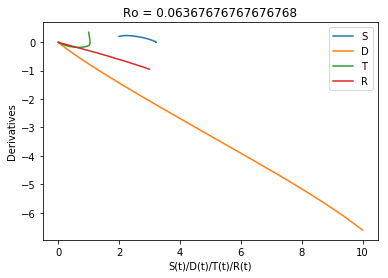

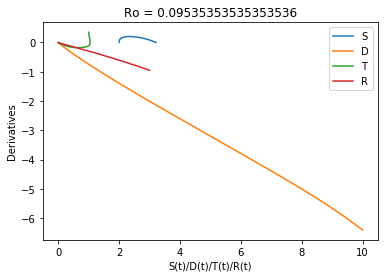

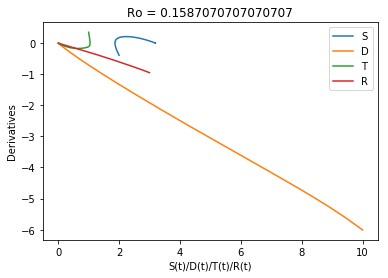

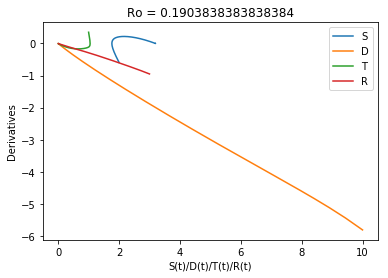

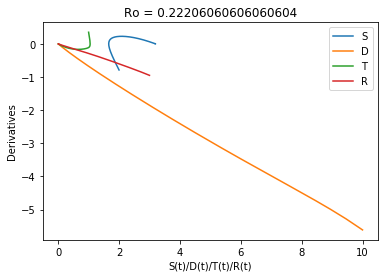

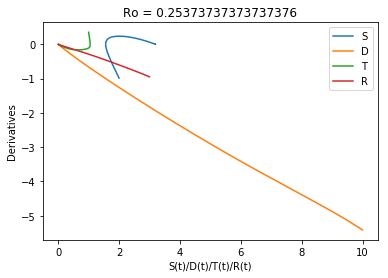

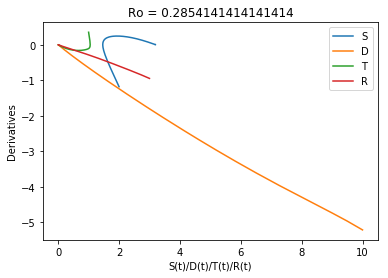

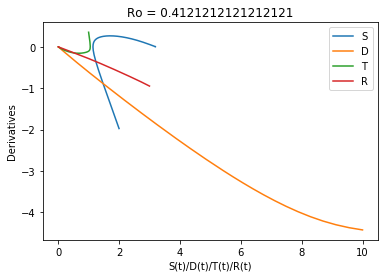

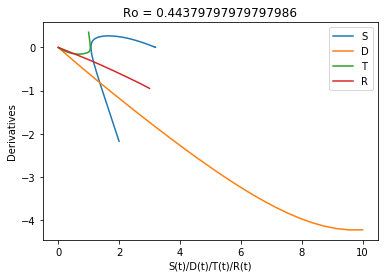

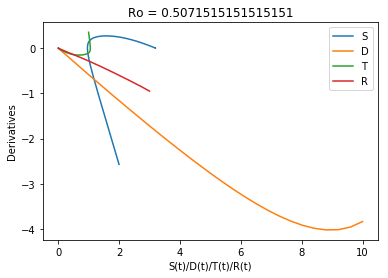

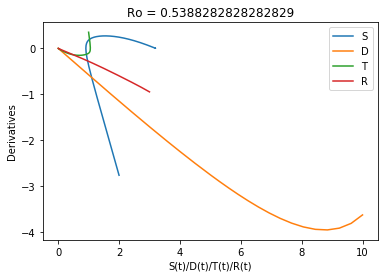

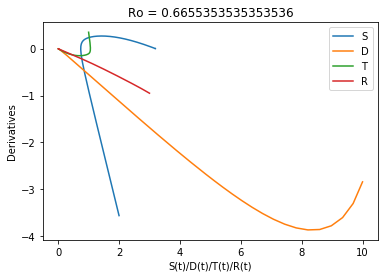

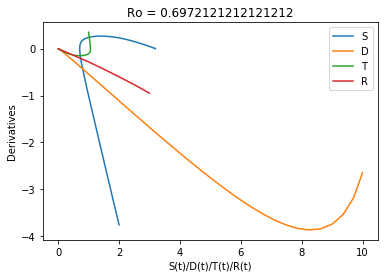

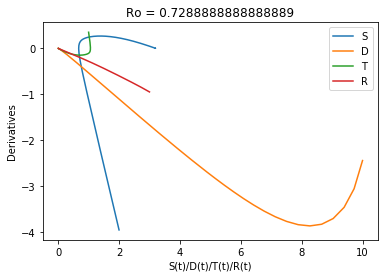

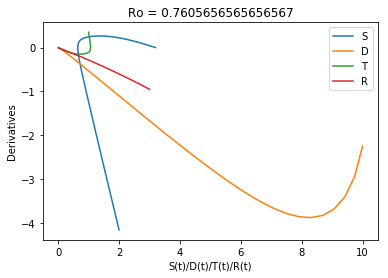

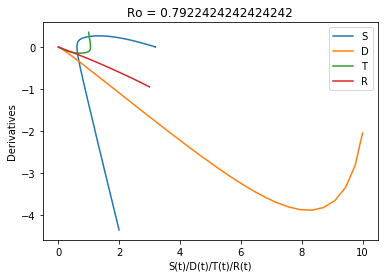

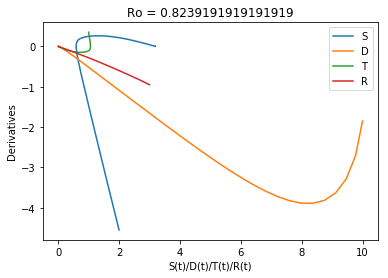

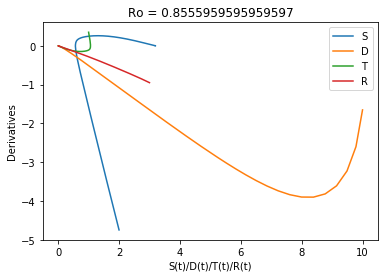

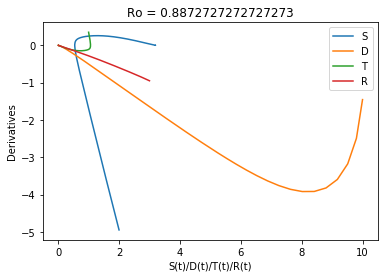

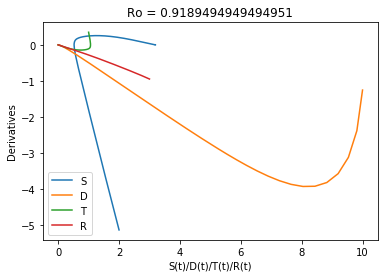

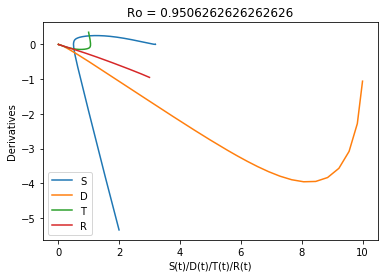

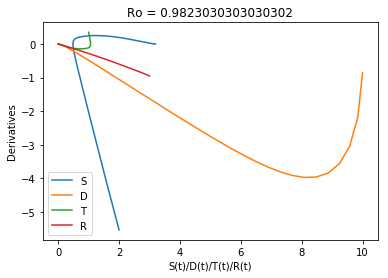

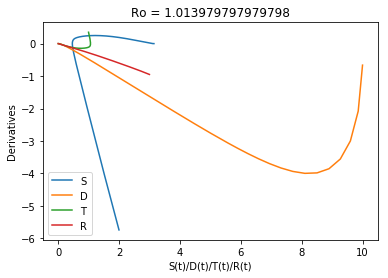

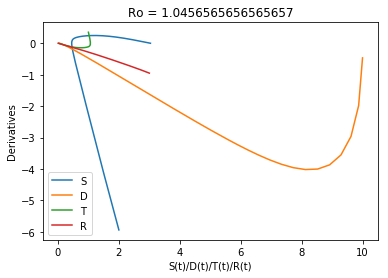

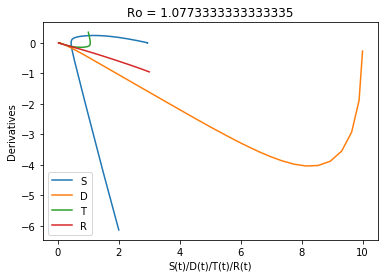

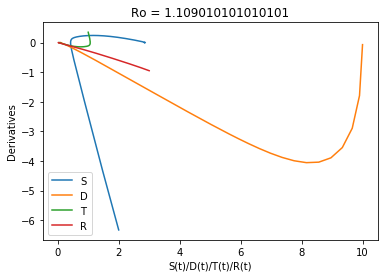

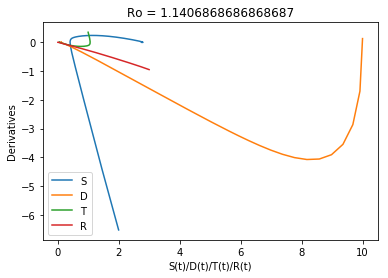

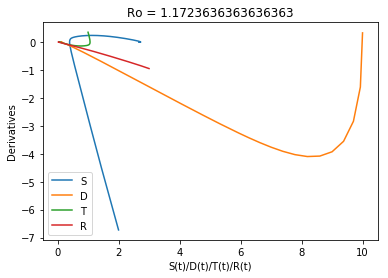

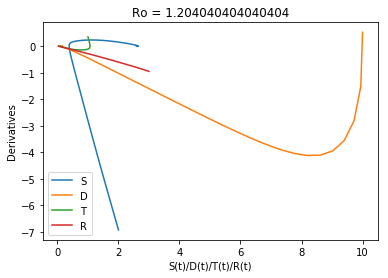

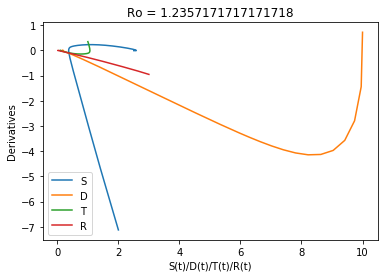

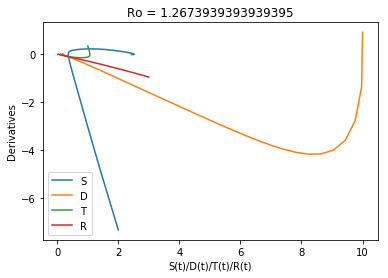

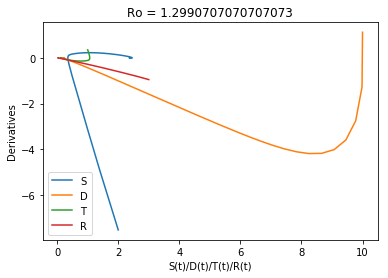

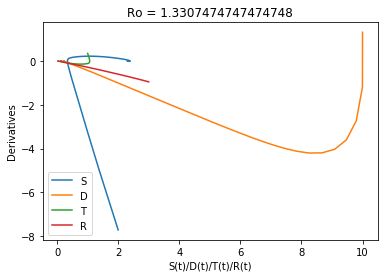

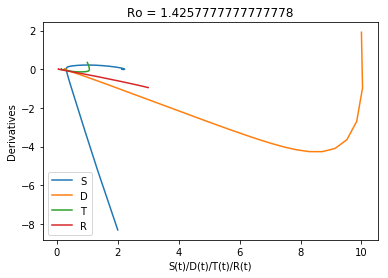

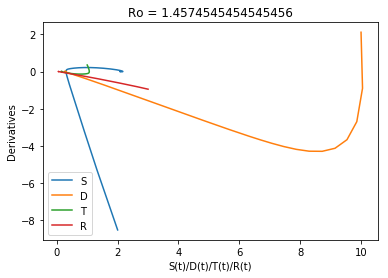

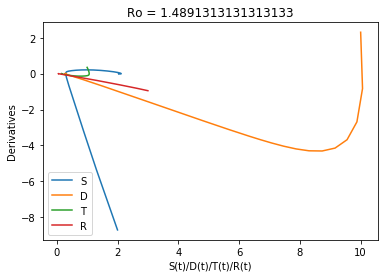

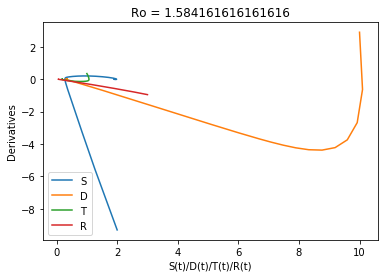

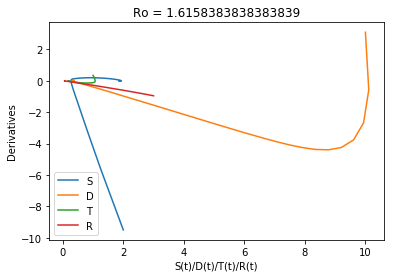

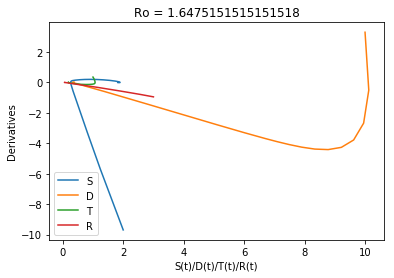

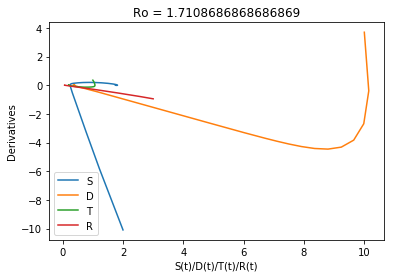

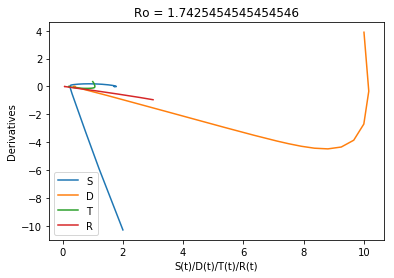

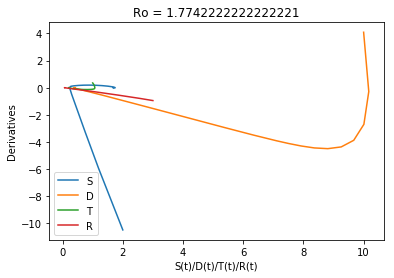

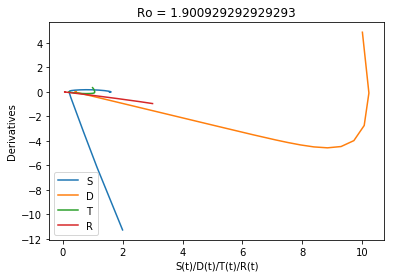

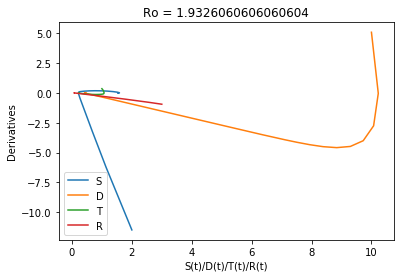

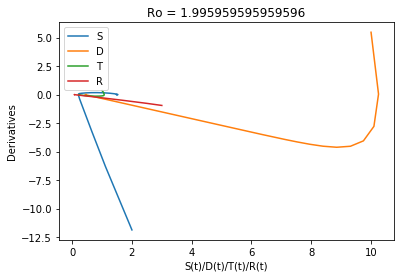

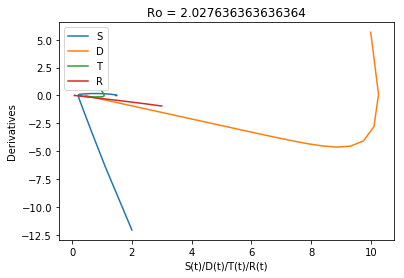

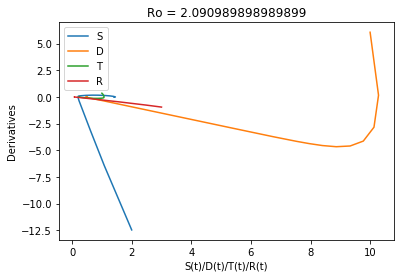

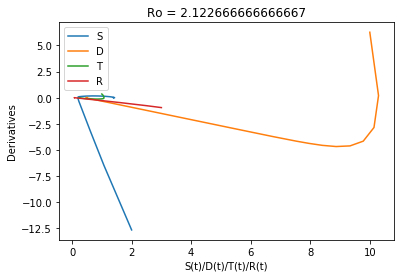

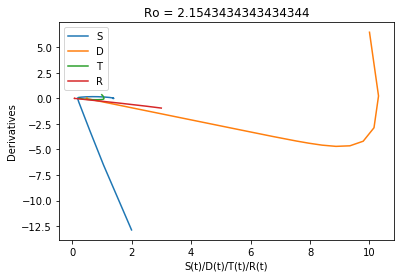

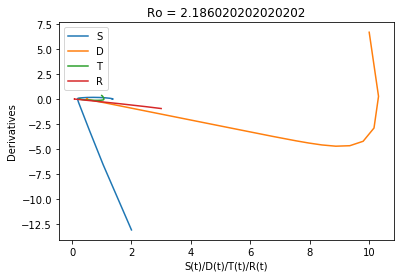

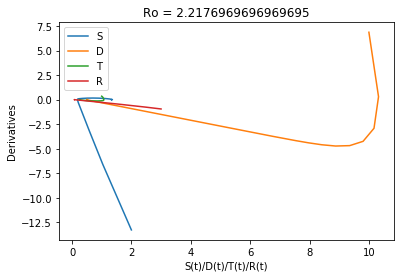

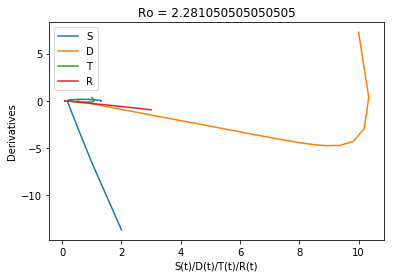

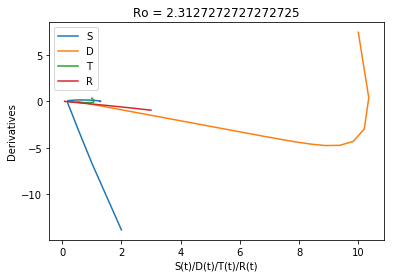

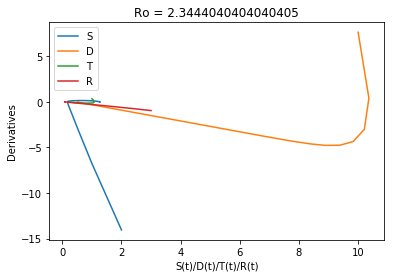

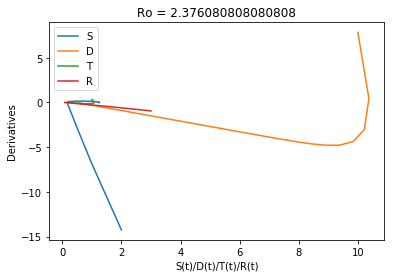

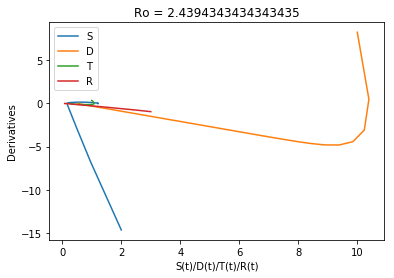

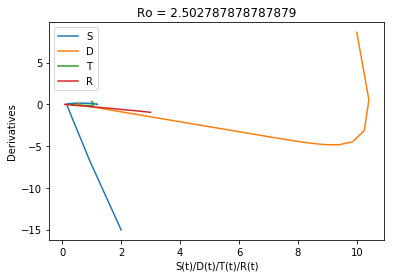

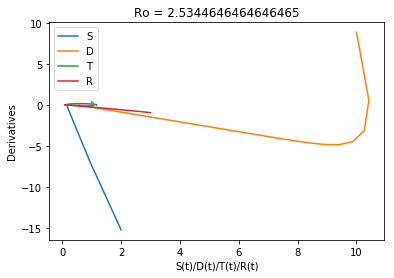

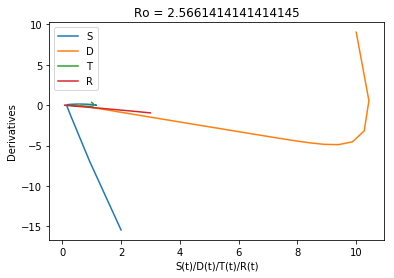

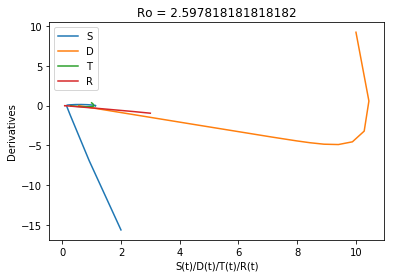

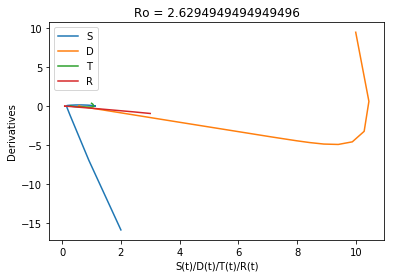

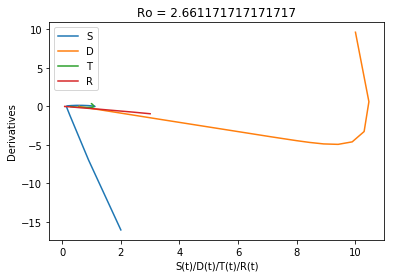

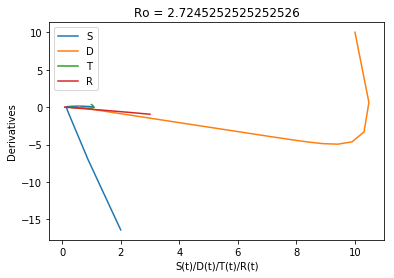

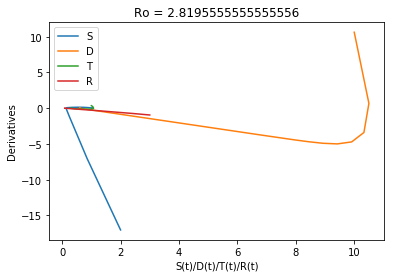

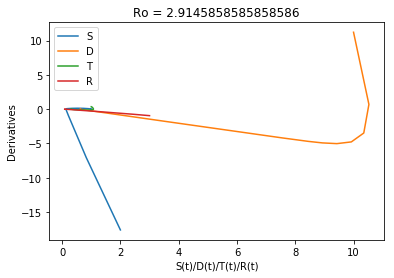

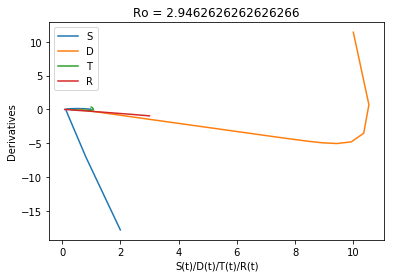

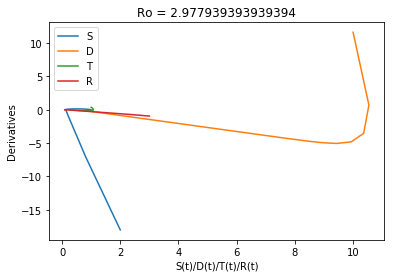

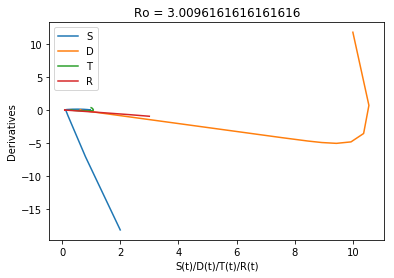

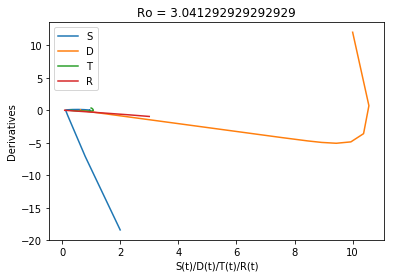

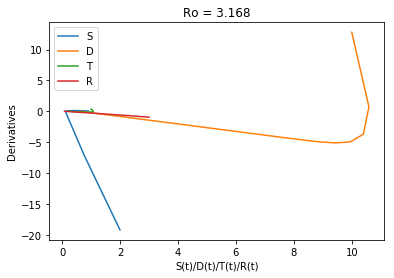

In [12]:
## Generating the frames
##Varying R_o with respect to b1
n_frames = 100
Ros = []
init = [2,10,1,3]
b1_list = np.linspace(0.01,0.99,n_frames)

D_fp_list = []

D_der_list = []
S_der_list = []
T_der_list = []
R_der_list = []

for i in range(n_frames):
    A = 0.8 #Recruitment rate of moderate and occasional drinkers
    b1 = b1_list[i] #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
    b2 = 0.3 #The transmission coefficient from drinkers in treatment to heavy drinkers
    u = 0.25 #Natural death rate of each population class
    s = 0.1 #Recovery rate of drinkers in treatment
    n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
    v = 0.4 #The proportion of drinkers who enter intreatment
    d1 = 0.35 #Natural death rate of each population class
    d2 = 0.3 #Drinking related death rate of drinkers intreatment

    R_o = R_num(A,b1,u,d1,v)
    Ros.append(R_o)

    ts = np.linspace(0,1000,10000)
    Ns = odeint(dP_dt,init,ts)
    S = Ns[:,0]
    D = Ns[:,1]
    T = Ns[:,2]
    R = Ns[:,3]
    D_fp_list.append(D[-1])
    
    S_der = A - b1*S*D - u*S + n*R
    D_der = b1*S*D + b2*T*D - (u+d1+v)*D
    T_der = v*D - b2*T*D - (u+d2+s)*T
    R_der = s*T - (u+n)*R
    
    S_der_list.append(S_der)
    D_der_list.append(D_der)
    T_der_list.append(T_der)
    R_der_list.append(R_der)
    
    plt.plot(S,S_der,label = 'S')
    plt.plot(D,D_der,label = 'D')
    plt.plot(T,T_der,label = 'T')
    plt.plot(R,R_der,label = 'R')
    plt.xlabel('S(t)/D(t)/T(t)/R(t)')
    plt.ylabel('Derivatives')
    titlename = 'Ro = ' + str(R_o)
    plt.title(titlename)
    plt.legend()
    
    filename = 'F:/Non-Linear Dynamics and Chaos/Project/Frames2/' +'frame_' + str(i) + '.png'
    plt.savefig(filename)
    plt.show()
    

In [13]:
input_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames2/'
filenames = []

for i in range(n_frames):
    filenames.append(input_dir + '/' + 'frame_' + str(i) + '.png')
    
output_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames2/'
framerate = 15
generate_gif(input_dir,output_dir,framerate)

## N(t) vs t

In [172]:
## Generating the frames
##Varying R_o with respect to b1
n_frames = 400
Ros = []
init = [2,10,1,3]
b1_list = np.linspace(0.01,4,n_frames)

D_fp_list = []
D_der_list = []
N = []
N_list = []

for i in range(n_frames):
    A = 0.8 #Recruitment rate of moderate and occasional drinkers
    b1 = b1_list[i] #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
    b2 = 0.3 #The transmission coefficient from drinkers in treatment to heavy drinkers
    u = 0.25 #Natural death rate of each population class
    s = 0.1 #Recovery rate of drinkers in treatment
    n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
    v = 0.4 #The proportion of drinkers who enter intreatment
    d1 = 0.35 #Natural death rate of each population class
    d2 = 0.3 #Drinking related death rate of drinkers intreatment

    R_o = R_num(A,b1,u,d1,v)
    Ros.append(R_o)

    ts = np.linspace(0,1000,10000)
    Ns = odeint(dP_dt,init,ts)
    S = Ns[:,0]
    D = Ns[:,1]
    T = Ns[:,2]
    R = Ns[:,3]
    
    N = np.array([S,D,T,R])
    Ns = N.sum(axis=0)
    N_list.append(Ns[-1])
    
#     plt.plot(Ros,Ns)
#     plt.xlabel('Time')
#     plt.ylabel('N(t)')
#     titlename = 'Ro = ' + str(R_o)
#     plt.title(titlename)
#     #plt.legend()
#     filename = 'F:/Non-Linear Dynamics and Chaos/Project/Frames4/' +'frame_' + str(i) + '.png'
#     plt.savefig(filename)
#     plt.show()
    
plt.plot(Ros,N_list)

plt.xlabel('Ro')
plt.ylabel('N*')
titlename = 'N* vs Ro'
plt.title(titlename)
#plt.legend()
direcname = 'F:/Non-Linear Dynamics and Chaos/Project/Images/Bifurcations/'
plt.savefig(direcname + 'param1_Neq')
plt.show()

In [169]:
N_list[-1]

1.5567421273761852

In [25]:
input_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames4/'
filenames = []

for i in range(n_frames):
    filenames.append(input_dir + '/' + 'frame_' + str(i) + '.png')
    
output_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames4/'
framerate = 15
generate_gif(input_dir,output_dir,framerate)

## Parameter set 2

In [130]:
A = 0.7 #Recruitment rate of moderate and occasional drinkers
b1 = 0.8 #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
b2 = 0.3 #The transmission coefficient from drinkers in treatment to heavy drinkers
u = 0.25 #Natural death rate of each population class
s = 0.1 #Recovery rate of drinkers in treatment
n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
v = 0.4 #The proportion of drinkers who enter intreatment
d1 = 0.35 #Natural death rate of each population class
d2 = 0.3 #Drinking related death rate of drinkers intreatment

R_o = R_num(A,b1,u,d1,v) #Reproductivity number
R_o

2.2399999999999998

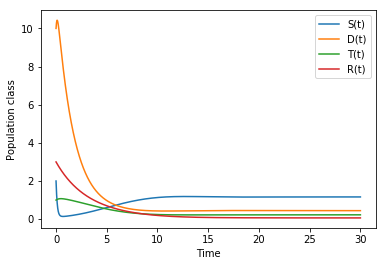

In [131]:
init = [2,10,1,3]
ts = np.linspace(0,30,10000)
Ns = odeint(dP_dt,init,ts)
S = Ns[:,0]
D = Ns[:,1]
T = Ns[:,2]
R = Ns[:,3]

plt.plot(ts,S,label = 'S(t)')
plt.plot(ts,D,label = 'D(t)')
plt.plot(ts,T,label = 'T(t)')
plt.plot(ts,R,label = 'R(t)')
plt.xlabel('Time')
plt.ylabel('Population class')
plt.legend()
plt.show()

In [132]:
Equilibrium(S,D,T,R)

(1.1647338333270125,
 0.445842780896684,
 0.2275117763224622,
 0.06513436717155131)

##### An Endemic equilibrium for the given parameters at (1.1647, 0.4458, 0.2275, 0.0651). This agrees with the results of the paper.

### Multiple Initial Conditions (Randomised initial conditions)

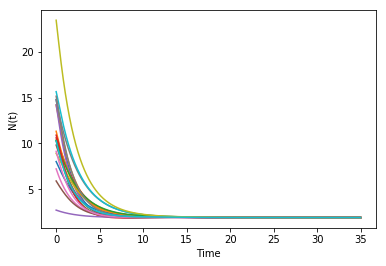

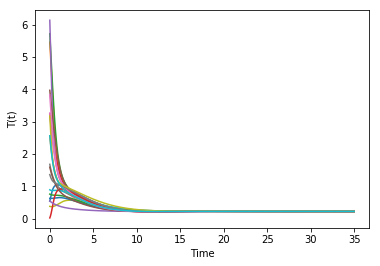

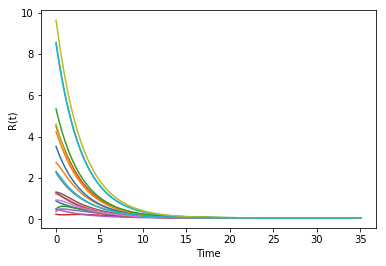

In [133]:
init = []
Super_Ns = []
Super_total = []
for i in range(20):
    temp_init = []
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    
    init.append(temp_init)
    
    ts = np.linspace(0,35,10000)
    
    Ns = odeint(dP_dt,temp_init,ts)
    total = np.array([Ns[:,0],Ns[:,1],Ns[:,2],Ns[:,3]])
    Super_total.append(total.sum(axis=0))
    
    Super_Ns.append(Ns) 
    
    

direcname = 'F:/Non-Linear Dynamics and Chaos/Project/Images/Param2/'
# Just N
for i in range(len(init)):
    plt.plot(ts,Super_total[i])
    
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.savefig(direcname + 'N(t)')
plt.show()

# Just S
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,0])
    
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.savefig(direcname + 'S(t)')
plt.show()


# Just D
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,1])
    
plt.xlabel('Time')
plt.ylabel('D(t)')
plt.savefig(direcname + 'D(t)' + '.png')
plt.show()

# Just T
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,2])
    
plt.xlabel('Time')
plt.ylabel('T(t)')
plt.savefig(direcname + 'T(t)' + '.png')
plt.show()

# Just R
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,3])
    
plt.xlabel('Time')
plt.ylabel('R(t)')
plt.savefig(direcname + 'R(t)' + '.png')
plt.show()

## Parameter set 3

In [27]:
A = 0.5 #Recruitment rate of moderate and occasional drinkers
b1 = 0.04 #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
b2 = 0.99 #The transmission coefficient from drinkers in treatment to heavy drinkers
u = 0.025 #Natural death rate of each population class
s = 0.01 #Recovery rate of drinkers in treatment
n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
v = 0.9 #The proportion of drinkers who enter intreatment
d1 = 0.035 #Natural death rate of each population class
d2 = 0.03 #Drinking related death rate of drinkers intreatment

R_o = R_num(A,b1,u,d1,v) #Reproductivity number
R_o

0.8333333333333333

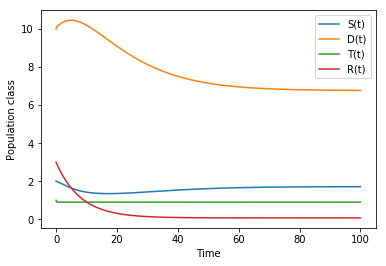

In [28]:
init = [2,10,1,3]
ts = np.linspace(0,100,10000)
Ns = odeint(dP_dt,init,ts)
S = Ns[:,0]
D = Ns[:,1]
T = Ns[:,2]
R = Ns[:,3]

plt.plot(ts,S,label = 'S(t)')
plt.plot(ts,D,label = 'D(t)')
plt.plot(ts,T,label = 'T(t)')
plt.plot(ts,R,label = 'R(t)')
plt.xlabel('Time')
plt.ylabel('Population class')
plt.legend()
plt.show()

### For Multiple Initial Conditions (Randomised initial conditions)

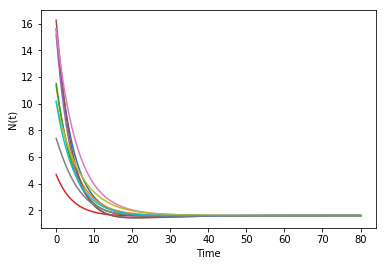

In [29]:
init = []
Super_Ns = []
for i in range(10):
    temp_init = []
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    temp_init.append(random.random()*random.randint(1,10))
    
    init.append(temp_init)
    
    ts = np.linspace(0,80,10000)
    
    Ns = odeint(dP_dt,temp_init,ts)
    total = np.array([Ns[:,0],Ns[:,1],Ns[:,2],Ns[:,3]])
    Super_total.append(total.sum(axis=0))
    
    Super_Ns.append(Ns) 
    
    

direcname = 'F:/Non-Linear Dynamics and Chaos/Project/Images/Param3/'
# Just N
for i in range(len(init)):
    plt.plot(ts,Super_total[i])
    
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.savefig(direcname + 'N(t)')
plt.show()

# Just S
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,0])
    
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.savefig(direcname + 'S(t)')
plt.show()


# Just D
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,1])
    
plt.xlabel('Time')
plt.ylabel('D(t)')
plt.savefig(direcname + 'D(t)' + '.png')
plt.show()

# Just T
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,2])
    
plt.xlabel('Time')
plt.ylabel('T(t)')
plt.savefig(direcname + 'T(t)' + '.png')
plt.show()

# Just R
for i in range(len(init)):
    plt.plot(ts,Super_Ns[i][:,3])
    
plt.xlabel('Time')
plt.ylabel('R(t)')
plt.savefig(direcname + 'R(t)' + '.png')
plt.show()

## N* vs Ro

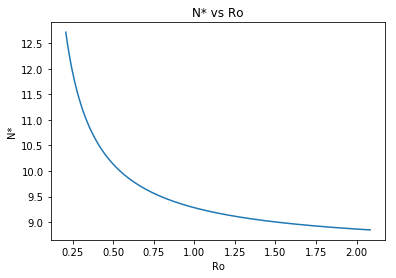

In [178]:
## Generating the frames
##Varying R_o with respect to b1
n_frames = 400
Ros = []
init = [2,10,1,3]
b1_list = np.linspace(0.01,0.1,n_frames)

D_fp_list = []
D_der_list = []
N = []
N_list = []

for i in range(n_frames):
    A = 0.5 #Recruitment rate of moderate and occasional drinkers
    b1 = b1_list[i] #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
    b2 = 0.99 #The transmission coefficient from drinkers in treatment to heavy drinkers
    u = 0.025 #Natural death rate of each population class
    s = 0.01 #Recovery rate of drinkers in treatment
    n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
    v = 0.9 #The proportion of drinkers who enter intreatment
    d1 = 0.035 #Natural death rate of each population class
    d2 = 0.03 #Drinking related death rate of drinkers intreatment

    R_o = R_num(A,b1,u,d1,v)
    Ros.append(R_o)

    ts = np.linspace(0,1000,10000)
    Ns = odeint(dP_dt,init,ts)
    S = Ns[:,0]
    D = Ns[:,1]
    T = Ns[:,2]
    R = Ns[:,3]
    
    N = np.array([S,D,T,R])
    Ns = N.sum(axis=0)
    N_list.append(Ns[-1])
    
#     plt.plot(Ros,Ns)
#     plt.xlabel('Time')
#     plt.ylabel('N(t)')
#     titlename = 'Ro = ' + str(R_o)
#     plt.title(titlename)
#     #plt.legend()
#     filename = 'F:/Non-Linear Dynamics and Chaos/Project/Frames4/' +'frame_' + str(i) + '.png'
#     plt.savefig(filename)
#     plt.show()
    
plt.plot(Ros,N_list)

plt.xlabel('Ro')
plt.ylabel('N*')
titlename = 'N* vs Ro'
plt.title(titlename)
#plt.legend()
direcname = 'F:/Non-Linear Dynamics and Chaos/Project/Images/Bifurcations/'
plt.savefig(direcname + 'param3_Neq')
plt.show()

## Generating the bifurcation diagrams

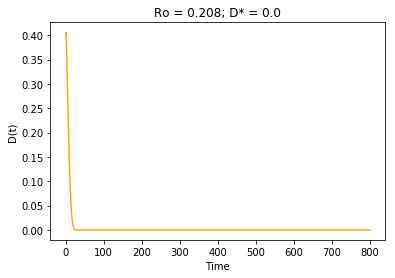

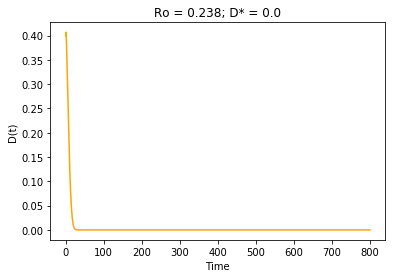

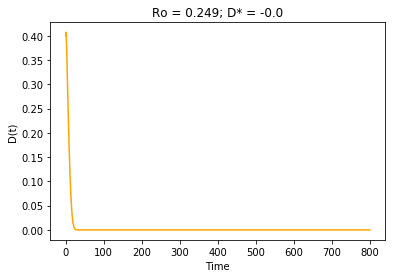

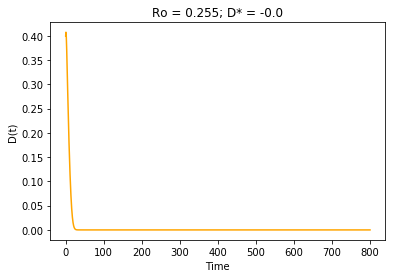

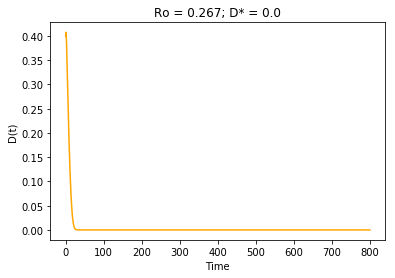

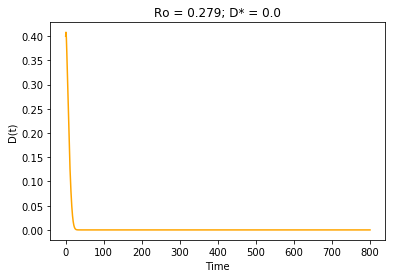

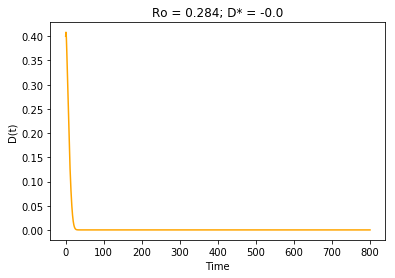

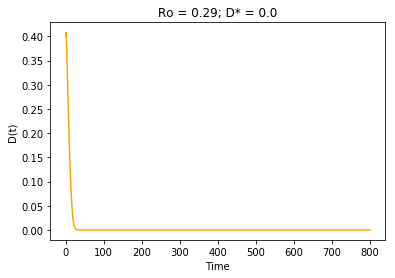

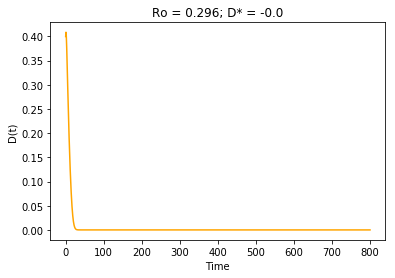

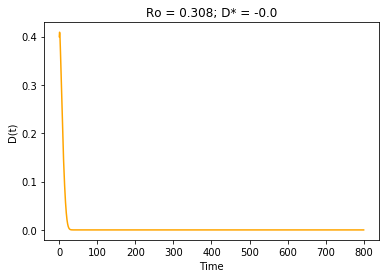

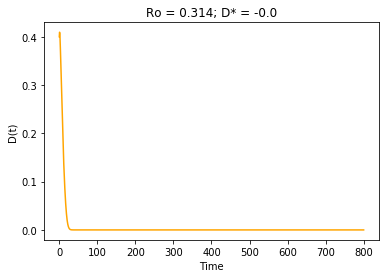

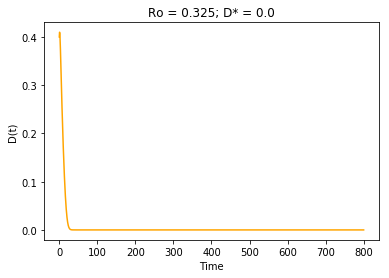

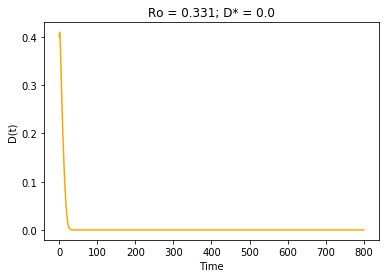

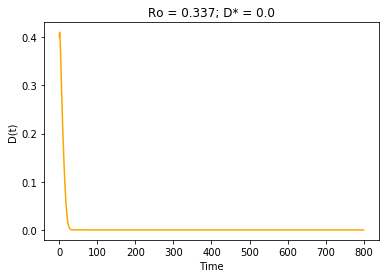

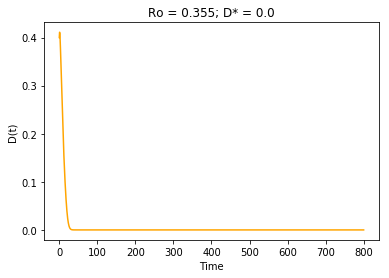

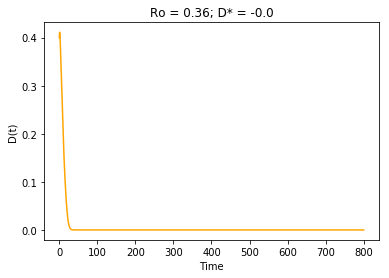

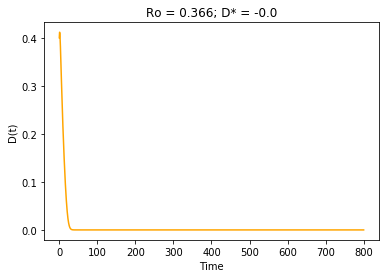

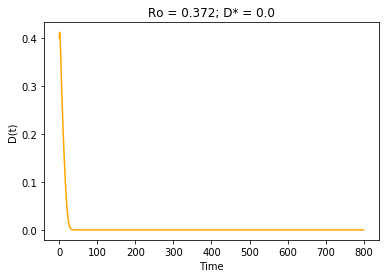

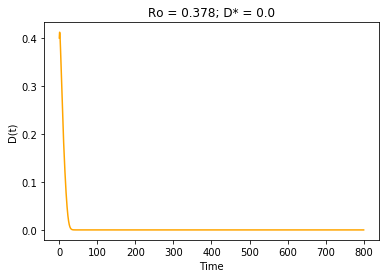

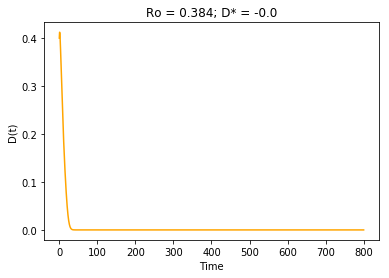

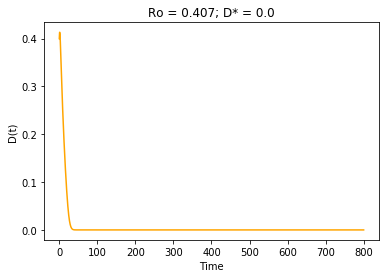

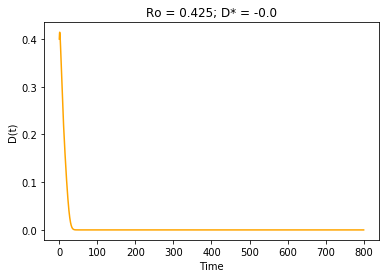

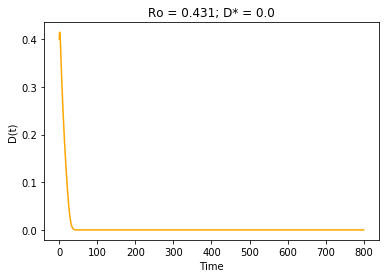

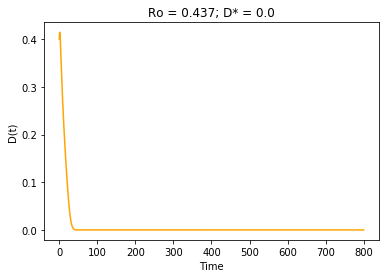

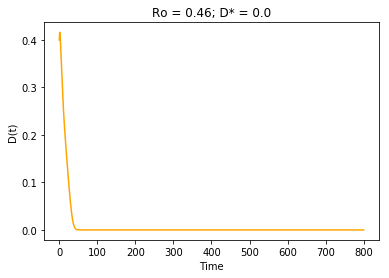

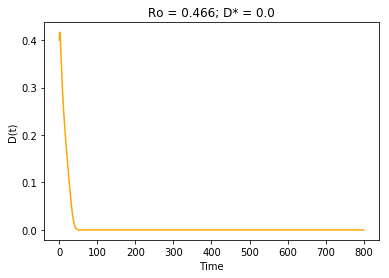

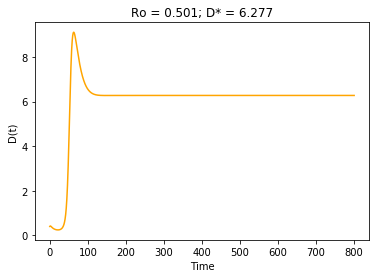

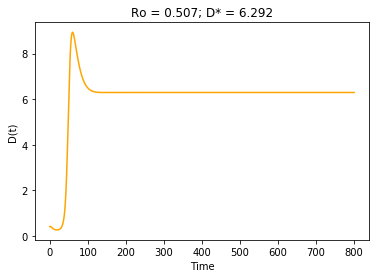

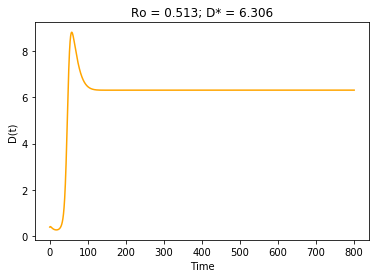

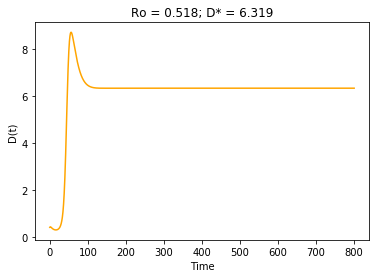

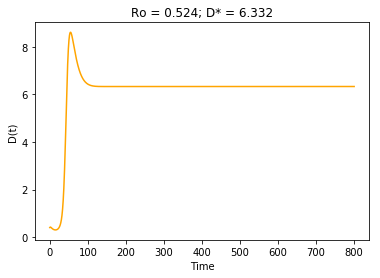

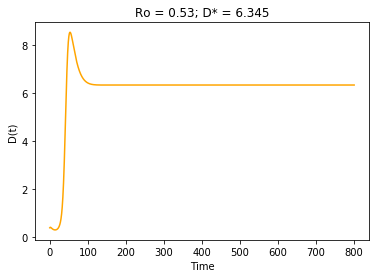

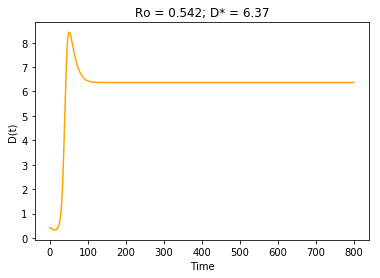

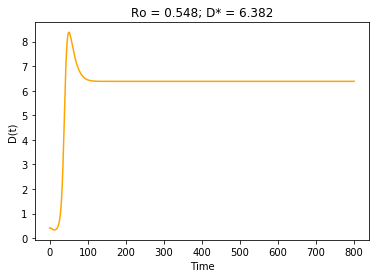

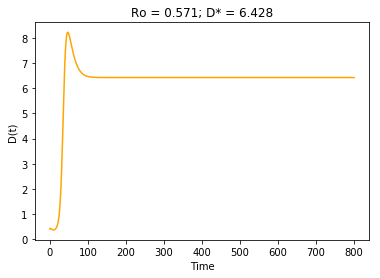

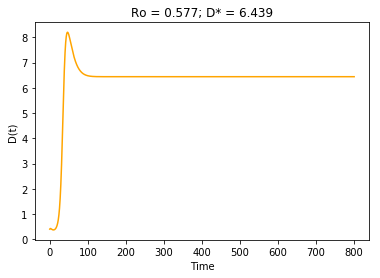

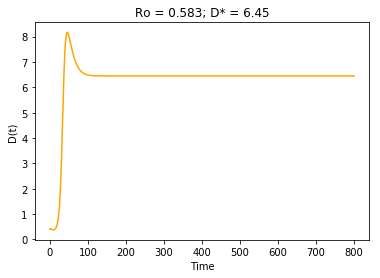

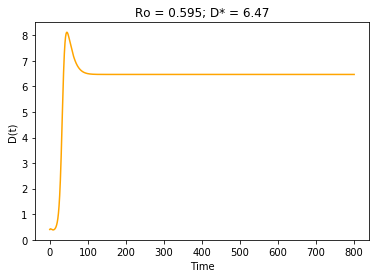

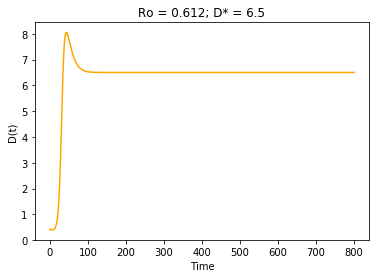

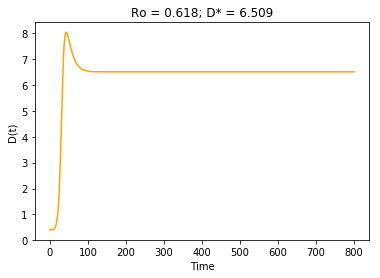

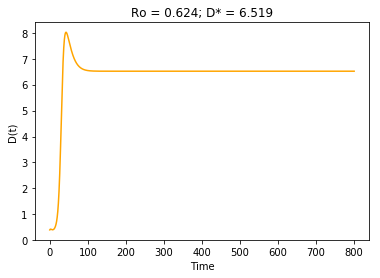

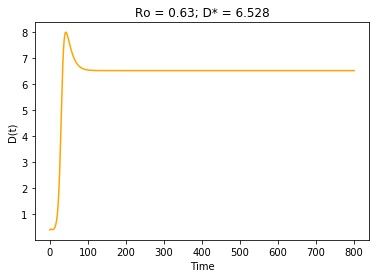

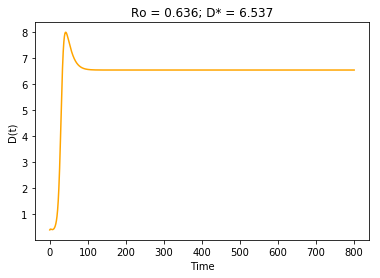

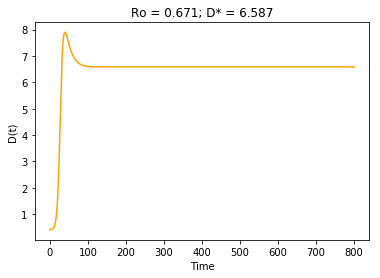

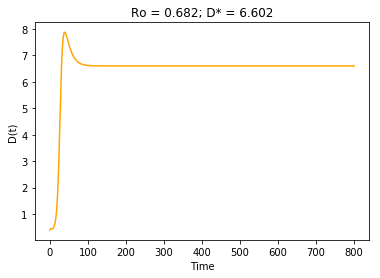

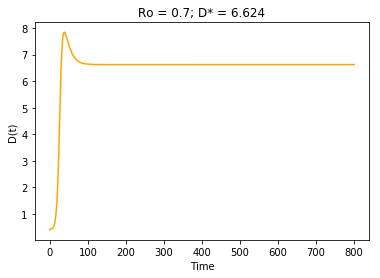

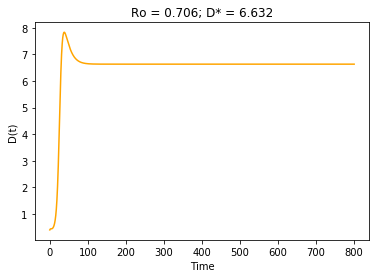

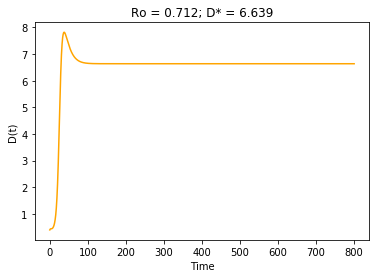

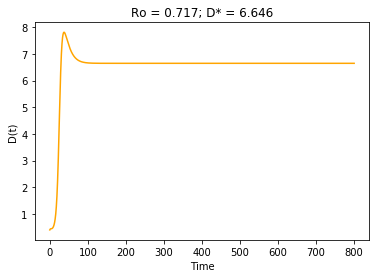

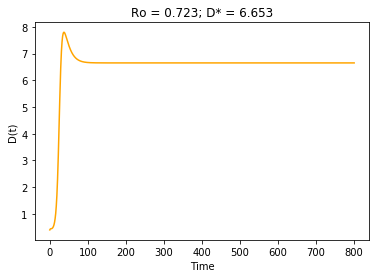

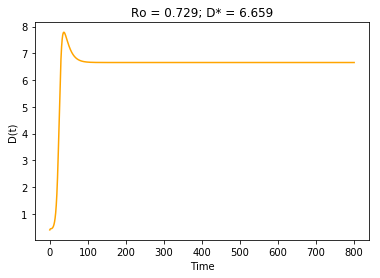

In [30]:
## Generating the frames
##Varying R_o with respect to b1
n_frames = 90
Ros = []
init = [2,0.4,1,3]
b1_list = np.linspace(0.01,0.035,n_frames)

D_fp_list = []

for i in range(n_frames):
    A = 0.5 #Recruitment rate of moderate and occasional drinkers
    b1 = b1_list[i] #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
    b2 = 0.99 #The transmission coefficient from drinkers in treatment to heavy drinkers
    u = 0.025 #Natural death rate of each population class
    s = 0.01 #Recovery rate of drinkers in treatment
    n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
    v = 0.9 #The proportion of drinkers who enter intreatment
    d1 = 0.035 #Natural death rate of each population class
    d2 = 0.03 #Drinking related death rate of drinkers intreatment

    R_o = R_num(A,b1,u,d1,v)
    Ros.append(R_o)

    ts = np.linspace(0,800,10000)
    Ns = odeint(dP_dt,init,ts)
    #S = Ns[:,0]
    D = Ns[:,1]
    #T = Ns[:,2]
    #R = Ns[:,3]
    D_fp_list.append(D[-1])
    plt.plot(ts,D,label = 'D(t)', color = 'orange')
    plt.xlabel('Time')
    plt.ylabel('D(t)')
    titlename = 'Ro = ' + str(round(R_o,3)) + '; D* = ' + str(round(D[-1],3))
    plt.title(titlename)
    #plt.legend()
    
    filename = 'F:/Non-Linear Dynamics and Chaos/Project/Frames1/' +'frame_' + str(i) + '.png'
    plt.savefig(filename)
    plt.show()


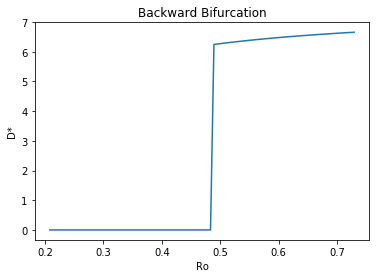

In [164]:
plt.plot(Ros,D_fp_list)
plt.xlabel('Ro')
plt.ylabel('D*')
plt.title('Backward Bifurcation')
direcname = 'F:/Non-Linear Dynamics and Chaos/Project/Images/Bifurcations/'
plt.savefig(direcname + 'backward')
plt.show()

### Making a GIF showing the bifurcation

In [31]:
input_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames1/'
filenames = []

for i in range(n_frames):
    filenames.append(input_dir + '/' + 'frame_' + str(i) + '.png')
    
output_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames1/'
framerate = 10
generate_gif(input_dir,output_dir,framerate)

## Phase Portrait

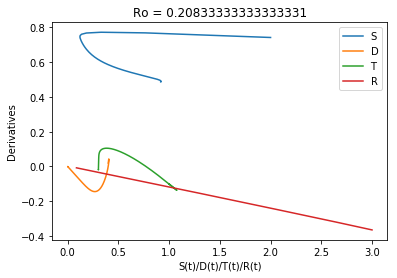

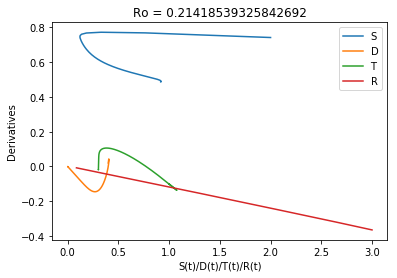

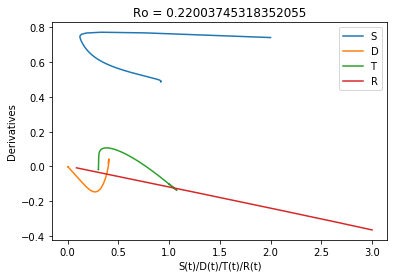

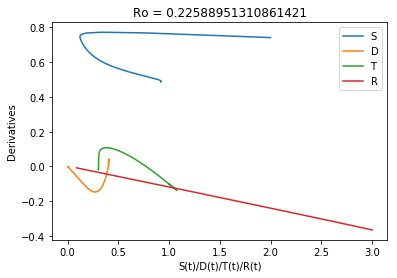

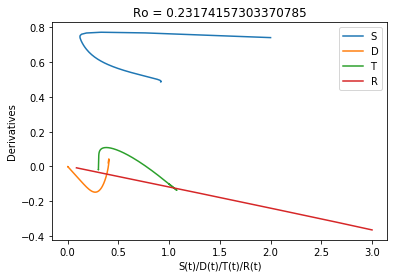

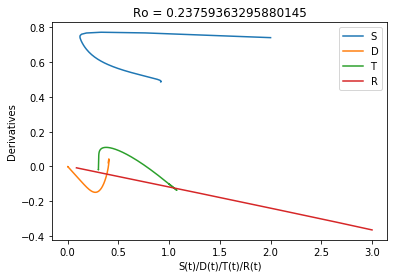

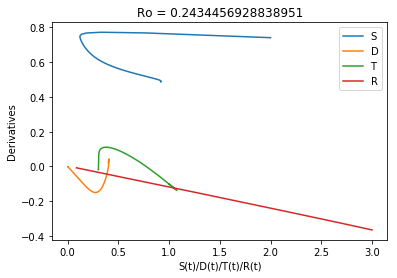

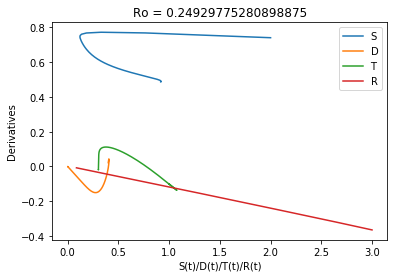

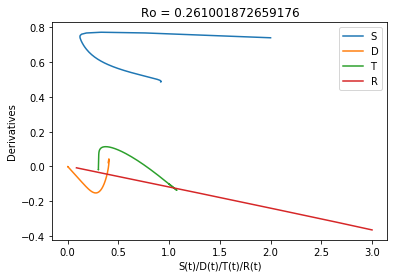

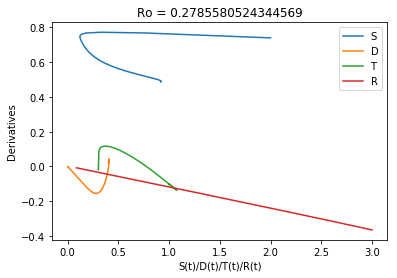

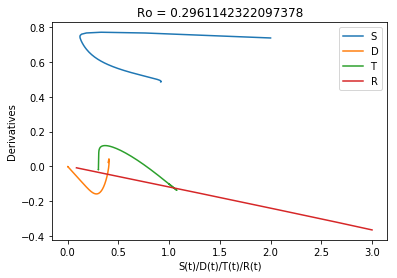

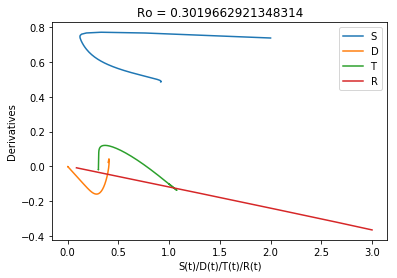

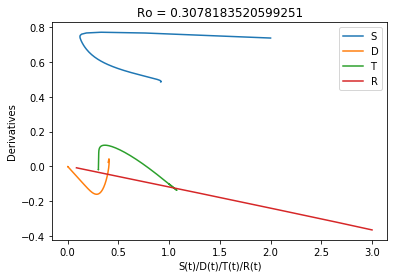

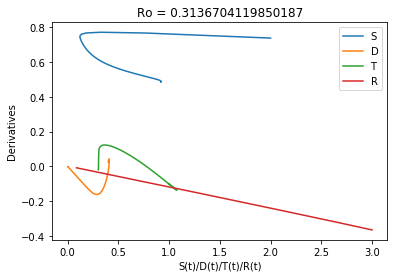

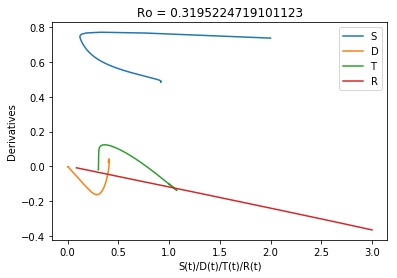

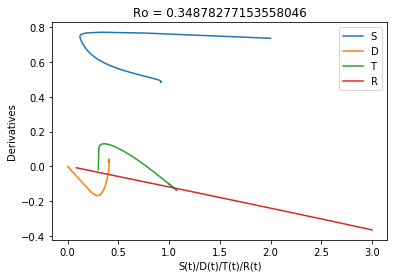

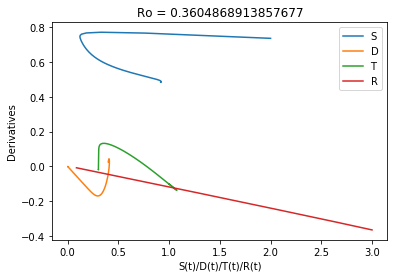

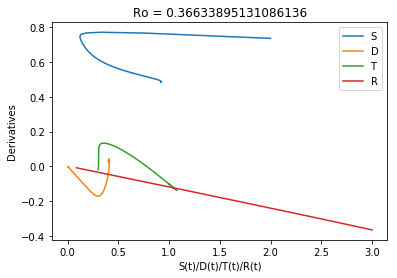

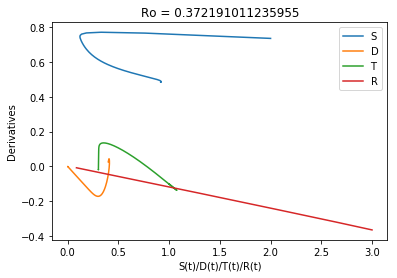

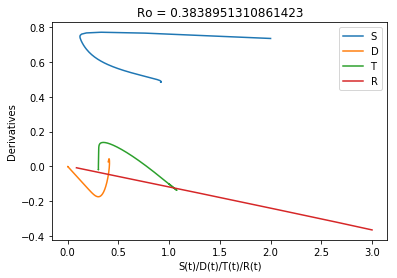

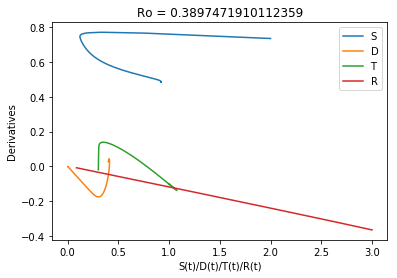

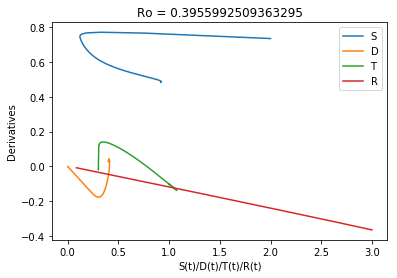

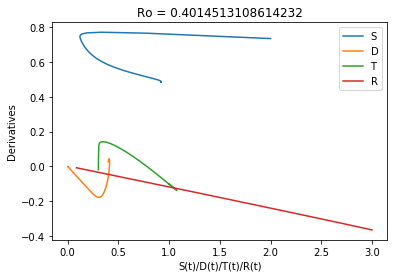

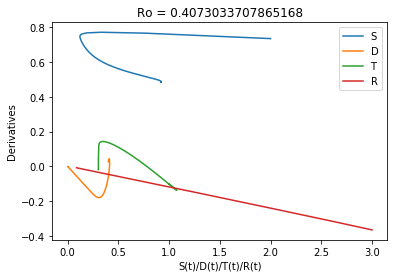

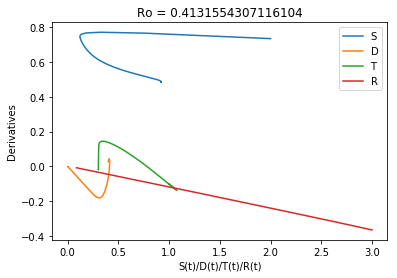

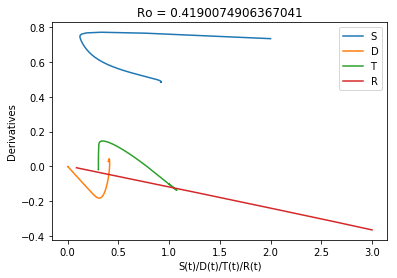

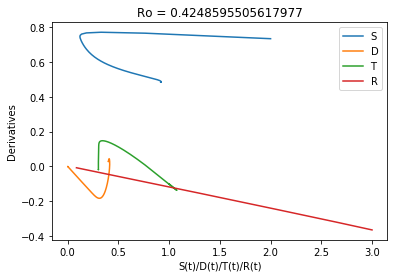

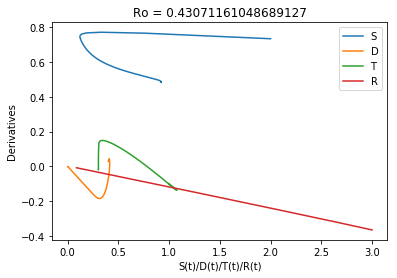

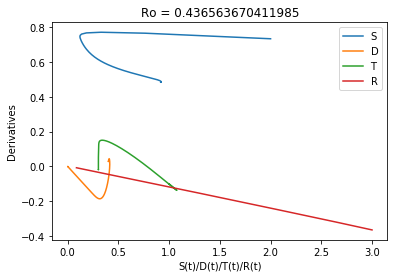

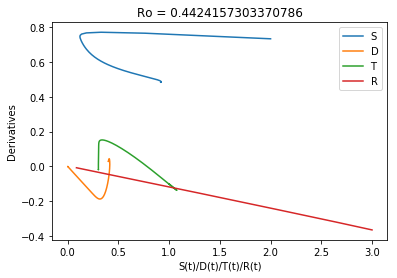

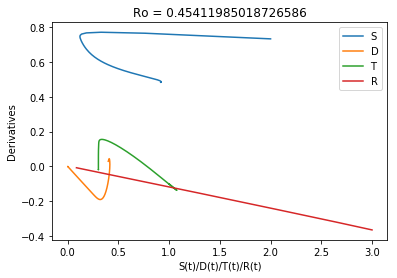

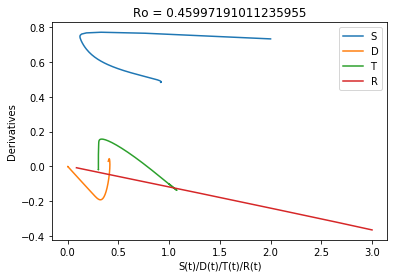

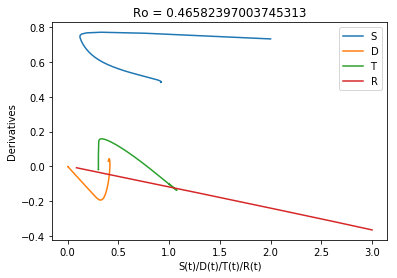

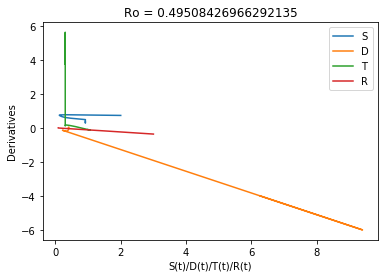

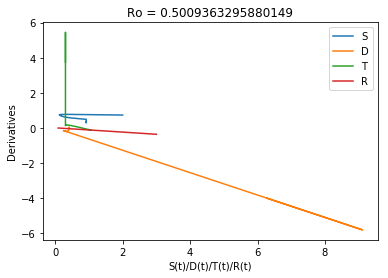

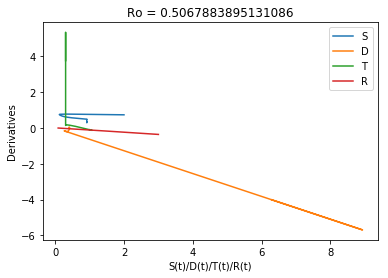

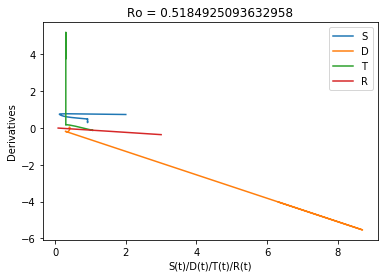

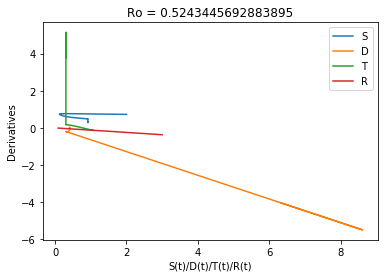

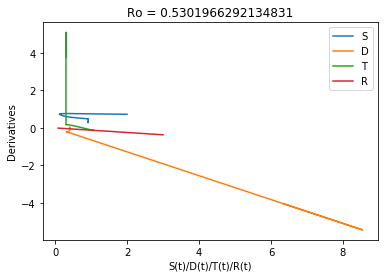

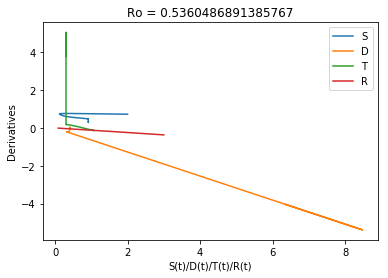

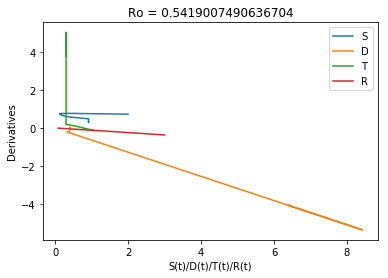

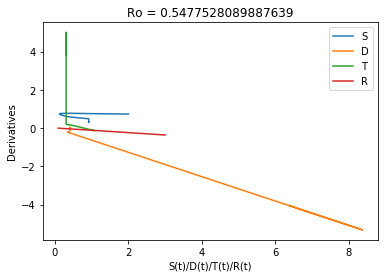

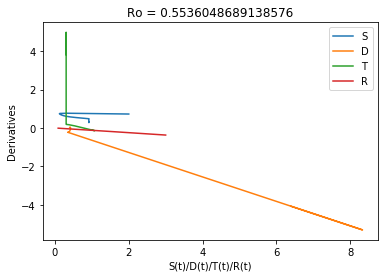

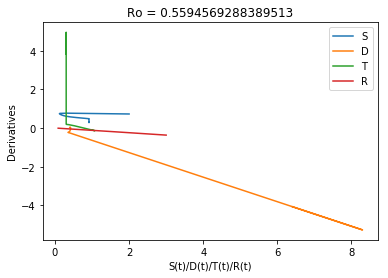

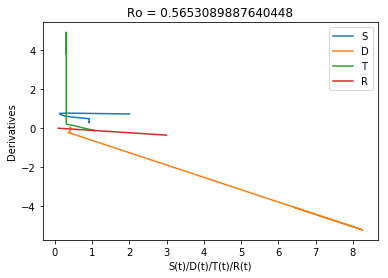

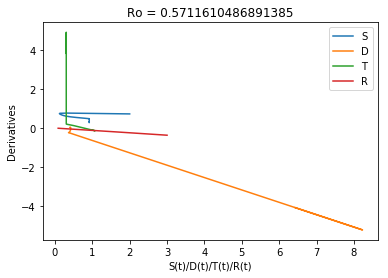

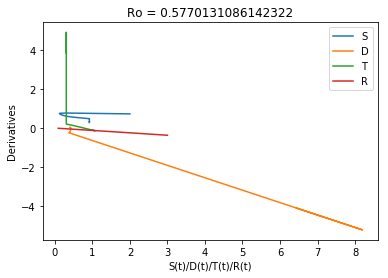

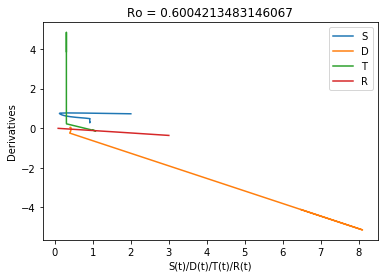

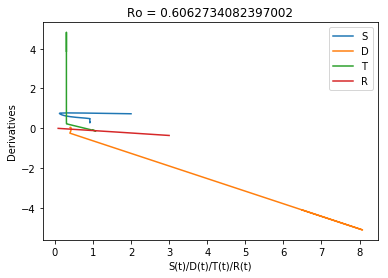

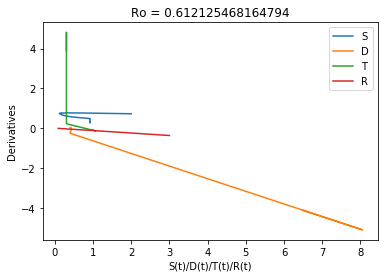

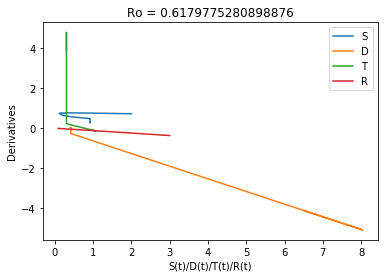

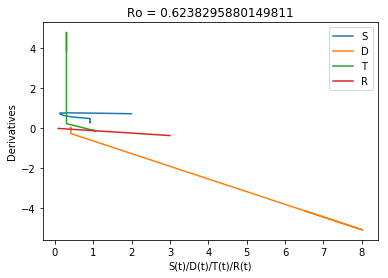

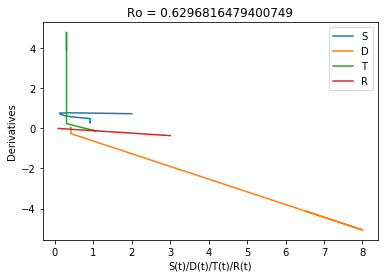

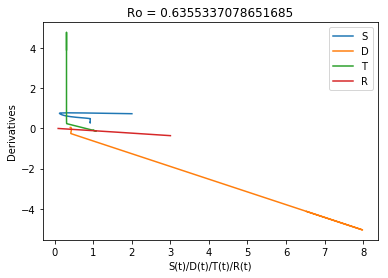

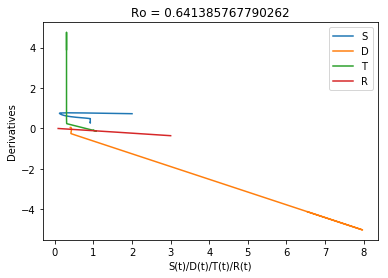

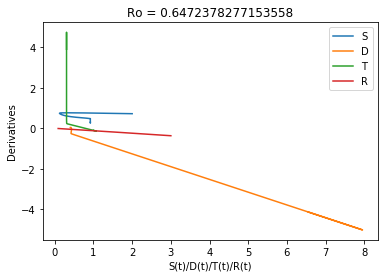

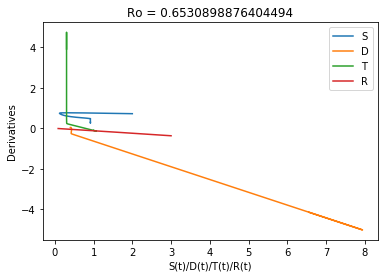

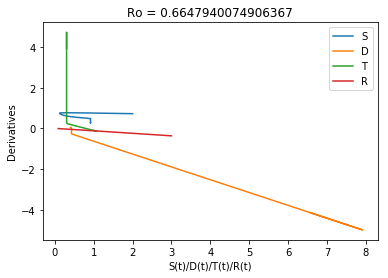

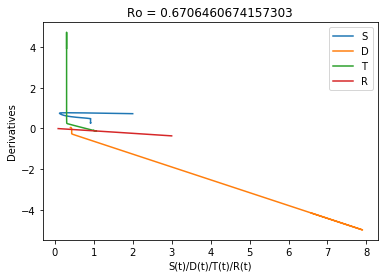

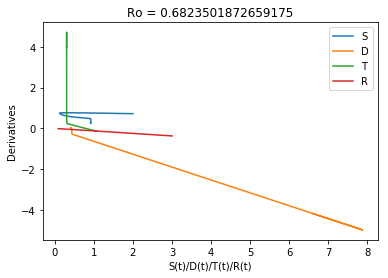

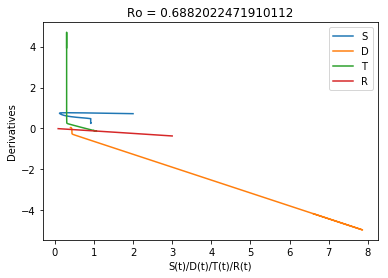

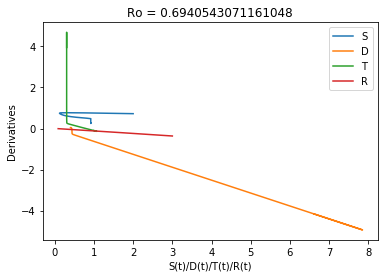

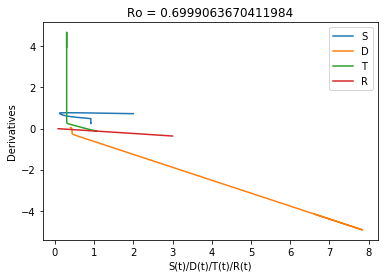

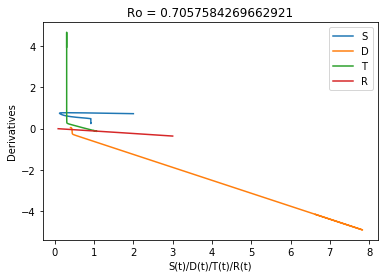

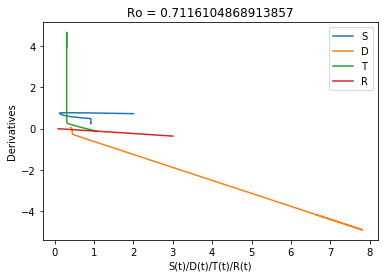

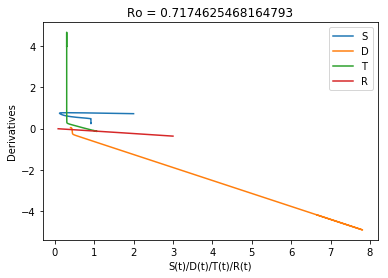

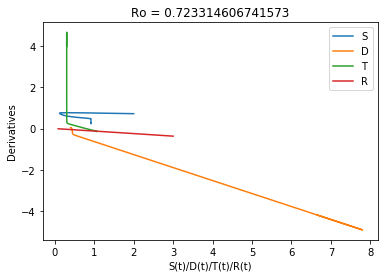

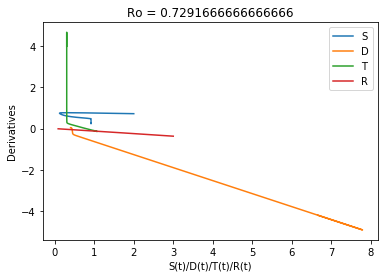

In [16]:
## Generating the frames
##Varying R_o with respect to b1
n_frames = 90
Ros = []
init = [2,0.4,1,3]
b1_list = np.linspace(0.01,0.035,n_frames)

D_fp_list = []

for i in range(n_frames):
    A = 0.5 #Recruitment rate of moderate and occasional drinkers
    b1 = b1_list[i] #The transmission coefficient from moderate and occasional drinkers to heavy drinkers
    b2 = 0.99 #The transmission coefficient from drinkers in treatment to heavy drinkers
    u = 0.025 #Natural death rate of each population class
    s = 0.01 #Recovery rate of drinkers in treatment
    n = 0.1 #The proportion of recovered class who re-enter into moderate and occasional drinkers class
    v = 0.9 #The proportion of drinkers who enter intreatment
    d1 = 0.035 #Natural death rate of each population class
    d2 = 0.03 #Drinking related death rate of drinkers intreatment

    R_o = R_num(A,b1,u,d1,v)
    Ros.append(R_o)

    ts = np.linspace(0,800,10000)
    Ns = odeint(dP_dt,init,ts)
    #S = Ns[:,0]
    D = Ns[:,1]
    #T = Ns[:,2]
    #R = Ns[:,3]
    D_fp_list.append(D[-1])
    
    S_der = A - b1*S*D - u*S + n*R
    D_der = b1*S*D + b2*T*D - (u+d1+v)*D
    T_der = v*D - b2*T*D - (u+d2+s)*T
    R_der = s*T - (u+n)*R
    
    S_der_list.append(S_der)
    D_der_list.append(D_der)
    T_der_list.append(T_der)
    R_der_list.append(R_der)
    
    plt.plot(S,S_der,label = 'S')
    plt.plot(D,D_der,label = 'D')
    plt.plot(T,T_der,label = 'T')
    plt.plot(R,R_der,label = 'R')
    plt.xlabel('S(t)/D(t)/T(t)/R(t)')
    plt.ylabel('Derivatives')
    titlename = 'Ro = ' + str(R_o)
    plt.title(titlename)
    plt.legend()
    
    filename = 'F:/Non-Linear Dynamics and Chaos/Project/Frames3/' +'frame_' + str(i) + '.png'
    plt.savefig(filename)
    plt.show()
    


In [17]:
input_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames3/'
filenames = []

for i in range(n_frames):
    filenames.append(input_dir + '/' + 'frame_' + str(i) + '.png')
    
output_dir = 'F:/Non-Linear Dynamics and Chaos/Project/Frames3/'
framerate = 15
generate_gif(input_dir,output_dir,framerate)